# Data Preparation and Data Wrangling:

## Summary: 

This notebook looks into the dataset named "kc_house_data.csv" located in the 'data' folder in this repository. This notebook dives into cleaning, correcting, and normalizing the data before it is used for a linera regrsssion model. This notebook also dives into visualizations using interaction terms between variavbles to detrmine important features for homes as well as correlations with the targer variable 'price'. The main takeaways from this data preparation is that the price of a home is mainly highly correlated with the square footage of the home and the number of bathrooms. 


The columns in this dataset are features of a home that sold in King County. The columns in this dataset are the following: 

### Column Names and Descriptions for King County Data Set:

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

Most fields were pulled from the [King County Assessor Data Download](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).

The `address`, `lat`, and `long` fields have been retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/). In some cases due to missing or incorrectly-entered data from the King County Assessor, this API returned locations outside of King County, WA. If you plan to use the `address`, `lat`, or `long` fields in your modeling, consider identifying outliers prior to including the values in your model.


# Main Goals:
1. Make sure columns are the appropriate data type
2. Identify columns with any null values or duplicated values
3. Remove columns that I believe are not necessary for analysis
4. Check for linearity using correlation coeafficients
5. Remove outliers
6. Checck for normality using qq plot and distplot
7. Select features for modeling
8. One hot encode anything that needs to be

# Questions to consider:
1. What features in this dataset can be good predictors for the price of a home?
2. What features in this dataset would decrease the price of a home and which ones would increase the price of a home?
3. Does location of a home matter in King County?

# Data Overview

In [228]:
# import any necessary libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [229]:
# Load dataset and view contents
king = pd.read_csv("../data/kc_house_data.csv")
king.head(3)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   

   sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0      7140     1.0         NO        NO  ...       PUBLIC       1180   
1      6703     1.0         NO        NO  ...       PUBLIC       1570   
2      6156     1.0         NO        NO  ...       PUBLIC       1580   

  sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0             0           0         40     1969             0   
1          1570           0        240     1950             0   
2          1580           0          0     1956             0   

                                             address        lat       long  
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  

[3 rows x 25 columns]

In [230]:
# View the columns in the king dataframe
king.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [231]:
# View datatypes in each column 
king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

**Observations:**
1. date, yr_built, yr_renovated should be in datetime format

# Deal with Duplicates and Null values/empty values

In [232]:
# Look at the unique identifier column and see if every record is a unique home 
print(king['id'].nunique())
#get sum of duplicates
king['id'].duplicated().sum()

30154


1

It seems that there is only 1 duplicate record so now lets drop that record.

In [233]:
#drop duplicates and only keep the most current data
king = king.sort_values('id').drop_duplicates(subset = 'id', keep = 'first')

#get sum of duplicates
king['id'].duplicated().sum()

0

Now that duplicates have been removed lets start removing any null values or missing values. 

In [234]:
#check for null values
king.isnull().sum() 

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [235]:
# Just based off know the size of the dataset 32 values max is a very small percentage of data. It would be appropriate to drop the rows. 
king.dropna(axis=0, inplace=True)

#check for null values to make sure
king.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [236]:
# Since we sorted it already and took care of the duplicates lets drop our identifiers column since it is no longer needed.
king.drop(labels='id', axis=1, inplace=True)

In [237]:
for col in king.columns:
    print(king.groupby(by = col)[col].count().sort_values(ascending = False))

date
7/1/2021      196
8/2/2021      186
7/6/2021      176
6/23/2021     176
6/16/2021     174
             ... 
1/16/2022       1
6/9/2022        1
12/25/2021      1
12/26/2021      1
12/5/2021       1
Name: date, Length: 365, dtype: int64
price
650000.0     345
750000.0     306
800000.0     298
850000.0     296
600000.0     295
            ... 
1100100.0      1
1100050.0      1
1099999.0      1
1099700.0      1
27360.0        1
Name: price, Length: 5199, dtype: int64
bedrooms
3     12745
4      9591
2      3925
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64
bathrooms
2.5     8471
2.0     7343
1.0     4556
3.0     4116
3.5     2264
1.5     1807
4.0      644
4.5      531
5.0      145
5.5      102
6.0       45
0.0       25
6.5       25
7.0       12
7.5       12
0.5        5
8.0        2
9.5        2
10.0       1
8.5        1
10.5       1
Name: bathrooms, dtype: int64
sqft_living
1250   

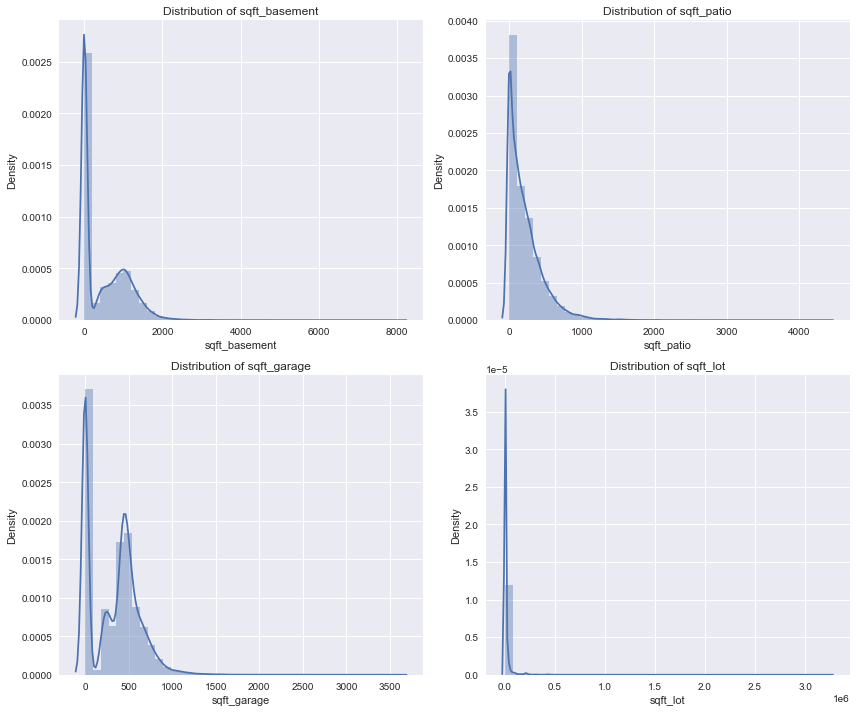

In [238]:
# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot the distribution plots on subplots
sns.distplot(king['sqft_basement'], bins=40, kde=True, ax=axs[0, 0])
sns.distplot(king['sqft_patio'], bins=40, kde=True, ax=axs[0, 1])
sns.distplot(king['sqft_garage'], bins=40, kde=True, ax=axs[1, 0])
sns.distplot(king['sqft_lot'], bins=40, kde=True, ax=axs[1, 1])

# Set titles for each subplot
axs[0, 0].set_title('Distribution of sqft_basement')
axs[0, 1].set_title('Distribution of sqft_patio')
axs[1, 0].set_title('Distribution of sqft_garage')
axs[1, 1].set_title('Distribution of sqft_lot')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [239]:
# Count the number of zero values in each column
num_zeros_sqft_basement = (king['sqft_basement'] == 0).sum()
num_zeros_sqft_patio = (king['sqft_patio'] == 0).sum()
num_zeros_sqft_garage = (king['sqft_garage'] == 0).sum()
num_zeros_sqft_lot = (king['sqft_lot'] == 0).sum()

# Print the results
print("Number of zero values in sqft_basement:", num_zeros_sqft_basement)
print("Number of zero values in sqft_patio:", num_zeros_sqft_patio)
print("Number of zero values in sqft_garage:", num_zeros_sqft_garage)
print("Number of zero values in sqft_lot:", num_zeros_sqft_lot)

Number of zero values in sqft_basement: 15434
Number of zero values in sqft_patio: 6746
Number of zero values in sqft_garage: 9978
Number of zero values in sqft_lot: 0


In [240]:
# View the value counts for each column
value_counts_sqft_basement = king['sqft_basement'].value_counts()
value_counts_sqft_patio = king['sqft_patio'].value_counts()
value_counts_sqft_garage = king['sqft_garage'].value_counts()
value_counts_sqft_lot = king['sqft_lot'].value_counts()

# Print the results
print("Value counts for sqft_basement:\n", value_counts_sqft_basement)
print("\nValue counts for sqft_patio:\n", value_counts_sqft_patio)
print("\nValue counts for sqft_garage:\n", value_counts_sqft_garage)
print("\nValue counts for sqft_lot:\n", value_counts_sqft_lot)


Value counts for sqft_basement:
 0       15434
1010      257
1100      224
1060      219
1200      192
        ...  
3350        1
1079        1
3110        1
2870        1
3590        1
Name: sqft_basement, Length: 459, dtype: int64

Value counts for sqft_patio:
 0       6746
100      906
80       886
60       858
40       839
        ... 
445        1
182        1
509        1
102        1
3550       1
Name: sqft_patio, Length: 526, dtype: int64

Value counts for sqft_garage:
 0       9978
440     1397
480     1301
400      941
420      934
        ... 
40         1
807        1
1215       1
759        1
775        1
Name: sqft_garage, Length: 411, dtype: int64

Value counts for sqft_lot:
 5000      486
6000      402
4000      374
7200      302
7500      181
         ... 
12895       1
23138       1
387684      1
617         1
4098        1
Name: sqft_lot, Length: 12223, dtype: int64


**Observations:** 
* We can see how sqft_patio, sqft_garage, and sqft_basement have missing values placed as zero. 
* We can simply drop 'view' since this columns suggests if the property was viewed which is not useful for this analysis.
* Since Basement has over half the data missing, we can instead just create a column that suggests if a home has a basement instead. 
* Garage, patio, and lot should be treatede as categories since there is not a lot of missing values. It seems that these are discrete values as not every home has a unique size.
* Treat patio
* The year renovated has a lot of zero values as well meaning not every home was renovated. Best to drop that column entirely. 

In [241]:
# Let 1 = True if it has a feature and 0 = False if it does not 
king['basement'] = king['sqft_basement'].map(lambda x: 0 if x == 0 else 1)
# Drop the original columns 
king.drop(labels=['sqft_basement', 'yr_renovated', 'view'], axis = 1, inplace = True)

# Checking for other sources of err in data (Correct datatypes, outliers) 

In [242]:
king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 21177 to 26110
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30110 non-null  object 
 1   price         30110 non-null  float64
 2   bedrooms      30110 non-null  int64  
 3   bathrooms     30110 non-null  float64
 4   sqft_living   30110 non-null  int64  
 5   sqft_lot      30110 non-null  int64  
 6   floors        30110 non-null  float64
 7   waterfront    30110 non-null  object 
 8   greenbelt     30110 non-null  object 
 9   nuisance      30110 non-null  object 
 10  condition     30110 non-null  object 
 11  grade         30110 non-null  object 
 12  heat_source   30110 non-null  object 
 13  sewer_system  30110 non-null  object 
 14  sqft_above    30110 non-null  int64  
 15  sqft_garage   30110 non-null  int64  
 16  sqft_patio    30110 non-null  int64  
 17  yr_built      30110 non-null  int64  
 18  address       30110 no

### Converting the columns date, yr_built, yr_renovated into datetime format.

In [243]:
import datetime

# Check if the columns are in datetime format
subset = ["date", "yr_built"]

for col in subset:
    x = isinstance(king[col][0], datetime.date)
    print(x)

False
False


Now that we made sure they are not in datetime format lets convert them to date format.

In [244]:
# State columns desired for datetime format
subset = ["date", "yr_built"]

for col in subset:
    king[col] = pd.to_datetime(king[col])

# Check if for loop worked correctly
for col in subset:
    x = isinstance(king[col][0], datetime.date)
    print(x)

True
True


### Convert Grade from string to usable categorical number 

In [245]:
king['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3803
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [246]:
# Define the regular expression pattern to extract the number and word separately
pattern = r'(\d+)\s(.+)'

# Use str.extract() to extract the number and word and create new columns
king[['extracted_grade_num', 'extracted_class']] = king['grade'].str.extract(pattern)

# Convert the 'extracted_number' column to integers
king['extracted_grade_num'] = king['extracted_grade_num'].astype(int)

# drop the class column
king.drop(labels=['extracted_class'], axis=1, inplace=True)

In [247]:
king.head(3)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
21177 2021-10-20   248448.0         3        1.5         1790     39808   
10844 2022-04-05   609000.0         4        1.5         2232     12866   
9292  2022-05-26  1020000.0         5        2.0         2760     15156   

       floors waterfront greenbelt nuisance  ... sewer_system sqft_above  \
21177     1.0         NO        NO       NO  ...       PUBLIC       1790   
10844     1.5         NO        NO       NO  ...       PUBLIC       2232   
9292      1.0         NO        NO       NO  ...       PUBLIC       1380   

      sqft_garage sqft_patio                      yr_built  \
21177         460        290 1970-01-01 00:00:00.000001958   
10844         440         60 1970-01-01 00:00:00.000001934   
9292            0          0 1970-01-01 00:00:00.000001954   

                                                 address       lat       long  \
21177  1526 I Street Northeast, Auburn, Washington 98...  47.32178 -122.21875   
10844  1412 I Street Northeast, Auburn, Washington 98...  47.32083 -122.21874   
9292   1104 Southwest Shorebrook Drive, Normandy Park...  47.44375 -122.34868   

      basement  extracted_grade_num  
21177        0                    7  
10844        0                    7  
9292         1                    8  

[3 rows x 23 columns]

### The last column that we need to change is the condition column. This column only contains the condition name but not its numeric value. We can subsitute the condition for just the number by adding a new column next to it with a for loop. 


Accodring to the website the following applies to that column:

"
Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.
"

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r 

In [248]:
# View the values in the column to make sure they line up correctly wth the website values. 
king['condition'].value_counts()

Average      18514
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [249]:
# Create a map of conditions strings to its associated values.
condition_mapping = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Very Good": 5
}

# Create a new column 'condition_num' and populate it before substitution
king['condition_num'] = 0  # Initialize the new column with 0

for index, val in king['condition'].items():
    if val in condition_mapping:
        king.loc[index, 'condition_num'] = condition_mapping[val]
    else:
        print(f"Warning: Condition '{val}' not found in the mapping.")

In [250]:
# Drop the condition column since we extracted the number
king.drop(labels='condition', axis=1, inplace=True)

### Check for outliers in the columns

We are going to need to standardize our continusos data in order to determine outliers. Any values greater than 3 satndard devaitions shoule be removed. 

In [251]:
king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 21177 to 26110
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 30110 non-null  datetime64[ns]
 1   price                30110 non-null  float64       
 2   bedrooms             30110 non-null  int64         
 3   bathrooms            30110 non-null  float64       
 4   sqft_living          30110 non-null  int64         
 5   sqft_lot             30110 non-null  int64         
 6   floors               30110 non-null  float64       
 7   waterfront           30110 non-null  object        
 8   greenbelt            30110 non-null  object        
 9   nuisance             30110 non-null  object        
 10  grade                30110 non-null  object        
 11  heat_source          30110 non-null  object        
 12  sewer_system         30110 non-null  object        
 13  sqft_above           30110 

<Figure size 720x360 with 0 Axes>

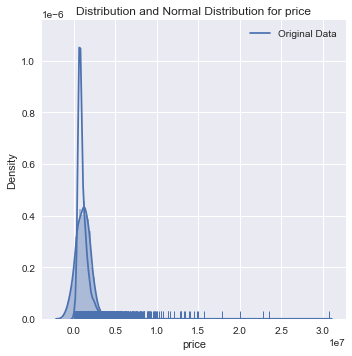

<Figure size 720x360 with 0 Axes>

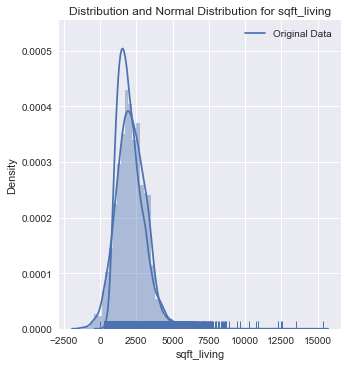

<Figure size 720x360 with 0 Axes>

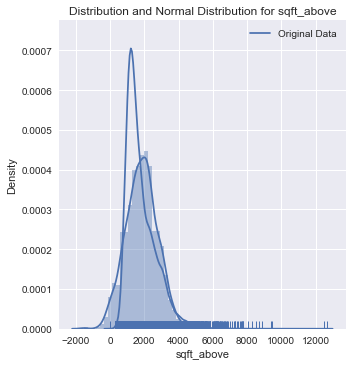

<Figure size 720x360 with 0 Axes>

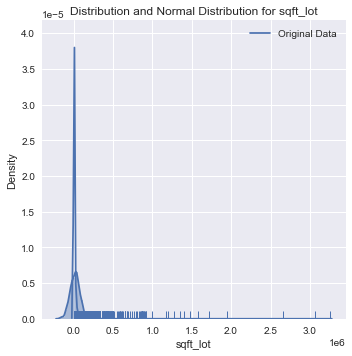

In [252]:
# Identify continuous data
continuous = ["price", "sqft_living", "sqft_above", 'sqft_lot']

# Create a new DataFrame to store the standardized data
standardized_data = king.copy()

# Standardize each feature in the 'continuous' list
for feature in standardized_data[continuous]:
    mean = king[feature].mean()
    std = king[feature].std()
    standardized_data[feature] = (king[feature] - mean) / std
    
    # Plot distribution plot
    plt.figure(figsize=(10, 5))
    sns.displot(king[feature], kind='kde', rug=True, label='Original Data')
    
    # Generate normal distribution data
    normal_dist = np.random.normal(mean, std, 1000)
    sns.distplot(normal_dist)
    
    plt.title(f"Distribution and Normal Distribution for {feature}")
    plt.legend()
    plt.show()

In [253]:
# Set the z-score threshold for outlier detection
z_threshold = 2

# Find outliers for each feature in 'standardized_data'
outliers = {}
for feature in standardized_data[continuous]:
    z_scores = (standardized_data[feature] - standardized_data[feature].mean()) / standardized_data[feature].std()
    outliers[feature] = standardized_data[feature][np.abs(z_scores) > z_threshold]

# Filter out the rows containing outliers from 'standardized_data'
for feature, outlier_values in outliers.items():
    standardized_data = standardized_data.loc[~standardized_data.index.isin(outlier_values.index)]

# Reset the index of 'standardized_data'
standardized_data.reset_index(drop=True, inplace=True)

# Display the 'standardized_data' DataFrame after removing outliers
standardized_data[continuous]


price  sqft_living  sqft_above  sqft_lot
0     -0.959825    -0.332119   -0.023201  0.386407
1     -0.557643     0.121942    0.480372 -0.063121
2     -0.099188     0.664351   -0.490315 -0.024912
3     -0.556528     0.315073   -0.683996 -0.018305
4     -0.456136    -0.404029   -0.102952 -0.133965
...         ...          ...         ...       ...
27582 -0.662496    -0.445121   -1.059966 -0.142641
27583 -0.383631    -0.178026    0.147695 -0.148531
27584 -0.743925    -1.092312   -0.866285 -0.075818
27585 -0.400363    -0.794399   -0.535887 -0.174660
27586 -0.127075     0.479439   -0.592852 -0.157658

[27587 rows x 4 columns]

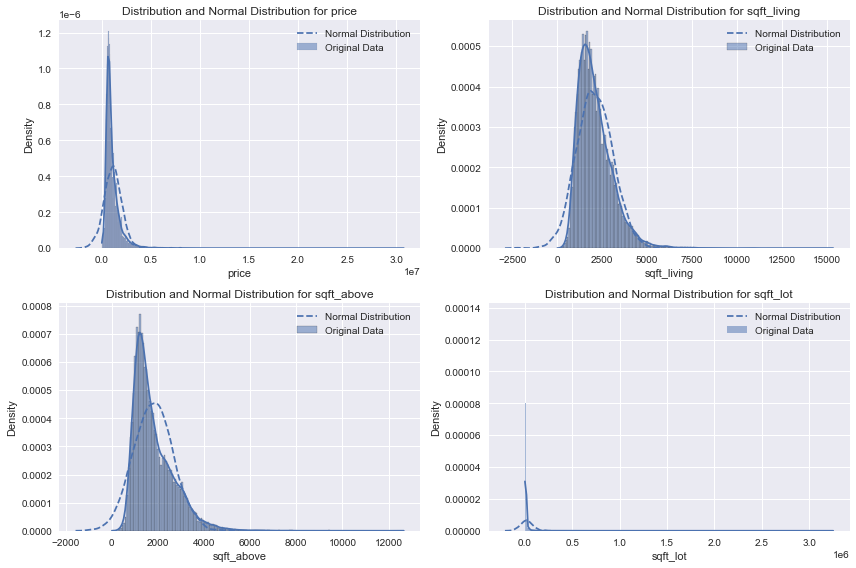

In [254]:
# Define the number of columns and rows for the subplots
nrows = 2  
ncols = 2  

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Standardize each feature in the 'continuous' list
for i, feature in enumerate(standardized_data[continuous]):
    mean = king[feature].mean()
    std = king[feature].std()
    
    # Plot distribution plot (KDE and histogram)
    sns.histplot(king[feature], kde=True, stat='density', label='Original Data', ax=axes[i])
    
    # Generate normal distribution data
    normal_dist = np.random.normal(mean, std, 2000)
    sns.kdeplot(normal_dist, label='Normal Distribution', linestyle='--', ax=axes[i])
    
    axes[i].set_title(f"Distribution and Normal Distribution for {feature}")
    axes[i].legend()

# Adjust layout to prevent overlapping titles and axes
plt.tight_layout()
plt.show()

In [255]:
# Create a new DataFrame to store the data in its original form
original_data = standardized_data.copy()

# Loop through each feature in 'continuous' list
for feature in original_data[continuous]:
    mean = king[feature].mean()
    std = king[feature].std()
    original_data[feature] = (standardized_data[feature] * std) + mean # standardized value is the z-score

# Clip the data to remove any negative values which can occur after reverting back from standardization values
num_columns = original_data.select_dtypes(include=[np.number]).columns
original_data[num_columns] = original_data[num_columns].clip(lower=0)

# Drop rows with zero values
zeros = original_data[(original_data[continuous] == 0).all(axis=1)]
original_data.drop(zeros.index, axis=0, inplace=True)

# Reset the index of 'original_data'
original_data.reset_index(drop=True, inplace=True)

# Display the 'original_data' DataFrame
original_data


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2021-10-20   248448.0         3        1.5       1790.0   39808.0   
1     2022-04-05   609000.0         4        1.5       2232.0   12866.0   
2     2022-05-26  1020000.0         5        2.0       2760.0   15156.0   
3     2022-01-03   610000.0         5        2.0       2420.0   15552.0   
4     2022-03-09   700000.0         3        2.0       1720.0    8620.0   
...          ...        ...       ...        ...          ...       ...   
27582 2021-10-27   515000.0         3        1.0       1680.0    8100.0   
27583 2022-05-09   765000.0         3        2.0       1940.0    7747.0   
27584 2022-04-07   442000.0         2        1.0       1050.0   12105.0   
27585 2021-07-09   750000.0         2        1.0       1340.0    6181.0   
27586 2021-11-18   995000.0         4        2.0       2580.0    7200.0   

       floors waterfront greenbelt nuisance  ... sqft_above sqft_garage  \
0         1.0         NO        NO       NO  ...     1790.0         460   
1         1.5         NO        NO       NO  ...     2232.0         440   
2         1.0         NO        NO       NO  ...     1380.0           0   
3         1.0         NO        NO       NO  ...     1210.0           0   
4         1.5         NO        NO       NO  ...     1720.0           0   
...       ...        ...       ...      ...  ...        ...         ...   
27582     1.0         NO        NO       NO  ...      880.0           0   
27583     1.5         NO        NO       NO  ...     1940.0         430   
27584     1.0         NO        NO       NO  ...     1050.0         220   
27585     1.5         NO        NO      YES  ...     1340.0           0   
27586     1.0         NO        NO       NO  ...     1290.0         310   

      sqft_patio                      yr_built  \
0            290 1970-01-01 00:00:00.000001958   
1             60 1970-01-01 00:00:00.000001934   
2              0 1970-01-01 00:00:00.000001954   
3            330 1970-01-01 00:00:00.000001955   
4              0 1970-01-01 00:00:00.000001948   
...          ...                           ...   
27582          0 1970-01-01 00:00:00.000001943   
27583        230 1970-01-01 00:00:00.000001939   
27584          0 1970-01-01 00:00:00.000001939   
27585        540 1970-01-01 00:00:00.000001920   
27586        160 1970-01-01 00:00:00.000001955   

                                                 address        lat long  \
0      1526 I Street Northeast, Auburn, Washington 98...  47.321780  0.0   
1      1412 I Street Northeast, Auburn, Washington 98...  47.320830  0.0   
2      1104 Southwest Shorebrook Drive, Normandy Park...  47.443750  0.0   
3      7205 South 133rd Street, Seattle, Washington 9...  47.483870  0.0   
4      5610 South 141st Street, Tukwila, Washington 9...  47.477070  0.0   
...                                                  ...        ...  ...   
27582  1220 Southwest 149th Street, Burien, Washingto...  47.469695  0.0   
27583  1255 Southwest 150th Street, Burien, Washingto...  47.468255  0.0   
27584  1249 Southwest 150th Street, Burien, Washingto...  47.468280  0.0   
27585  1412 Southwest 152nd Street, Burien, Washingto...  47.466975  0.0   
27586  11740 24th Avenue Northeast, Seattle, Washingt...  47.715120  0.0   

      basement  extracted_grade_num  condition_num  
0            0                    7              4  
1            0                    7              4  
2            1                    8              4  
3            1                    7              3  
4            0                    7              5  
...        ...                  ...            ...  
27582        1                    6              4  
27583        0                    7              4  
27584        0                    6              3  
27585        1                    7              4  
27586        1                    8              3  

[27587 rows x 23 columns]

# Exploratory Data Analysis

Lets explore what can be continuos that in reality is categorical and vice versa. 

### Determine Linearity between variables

Determine Linearity Visually first between variables

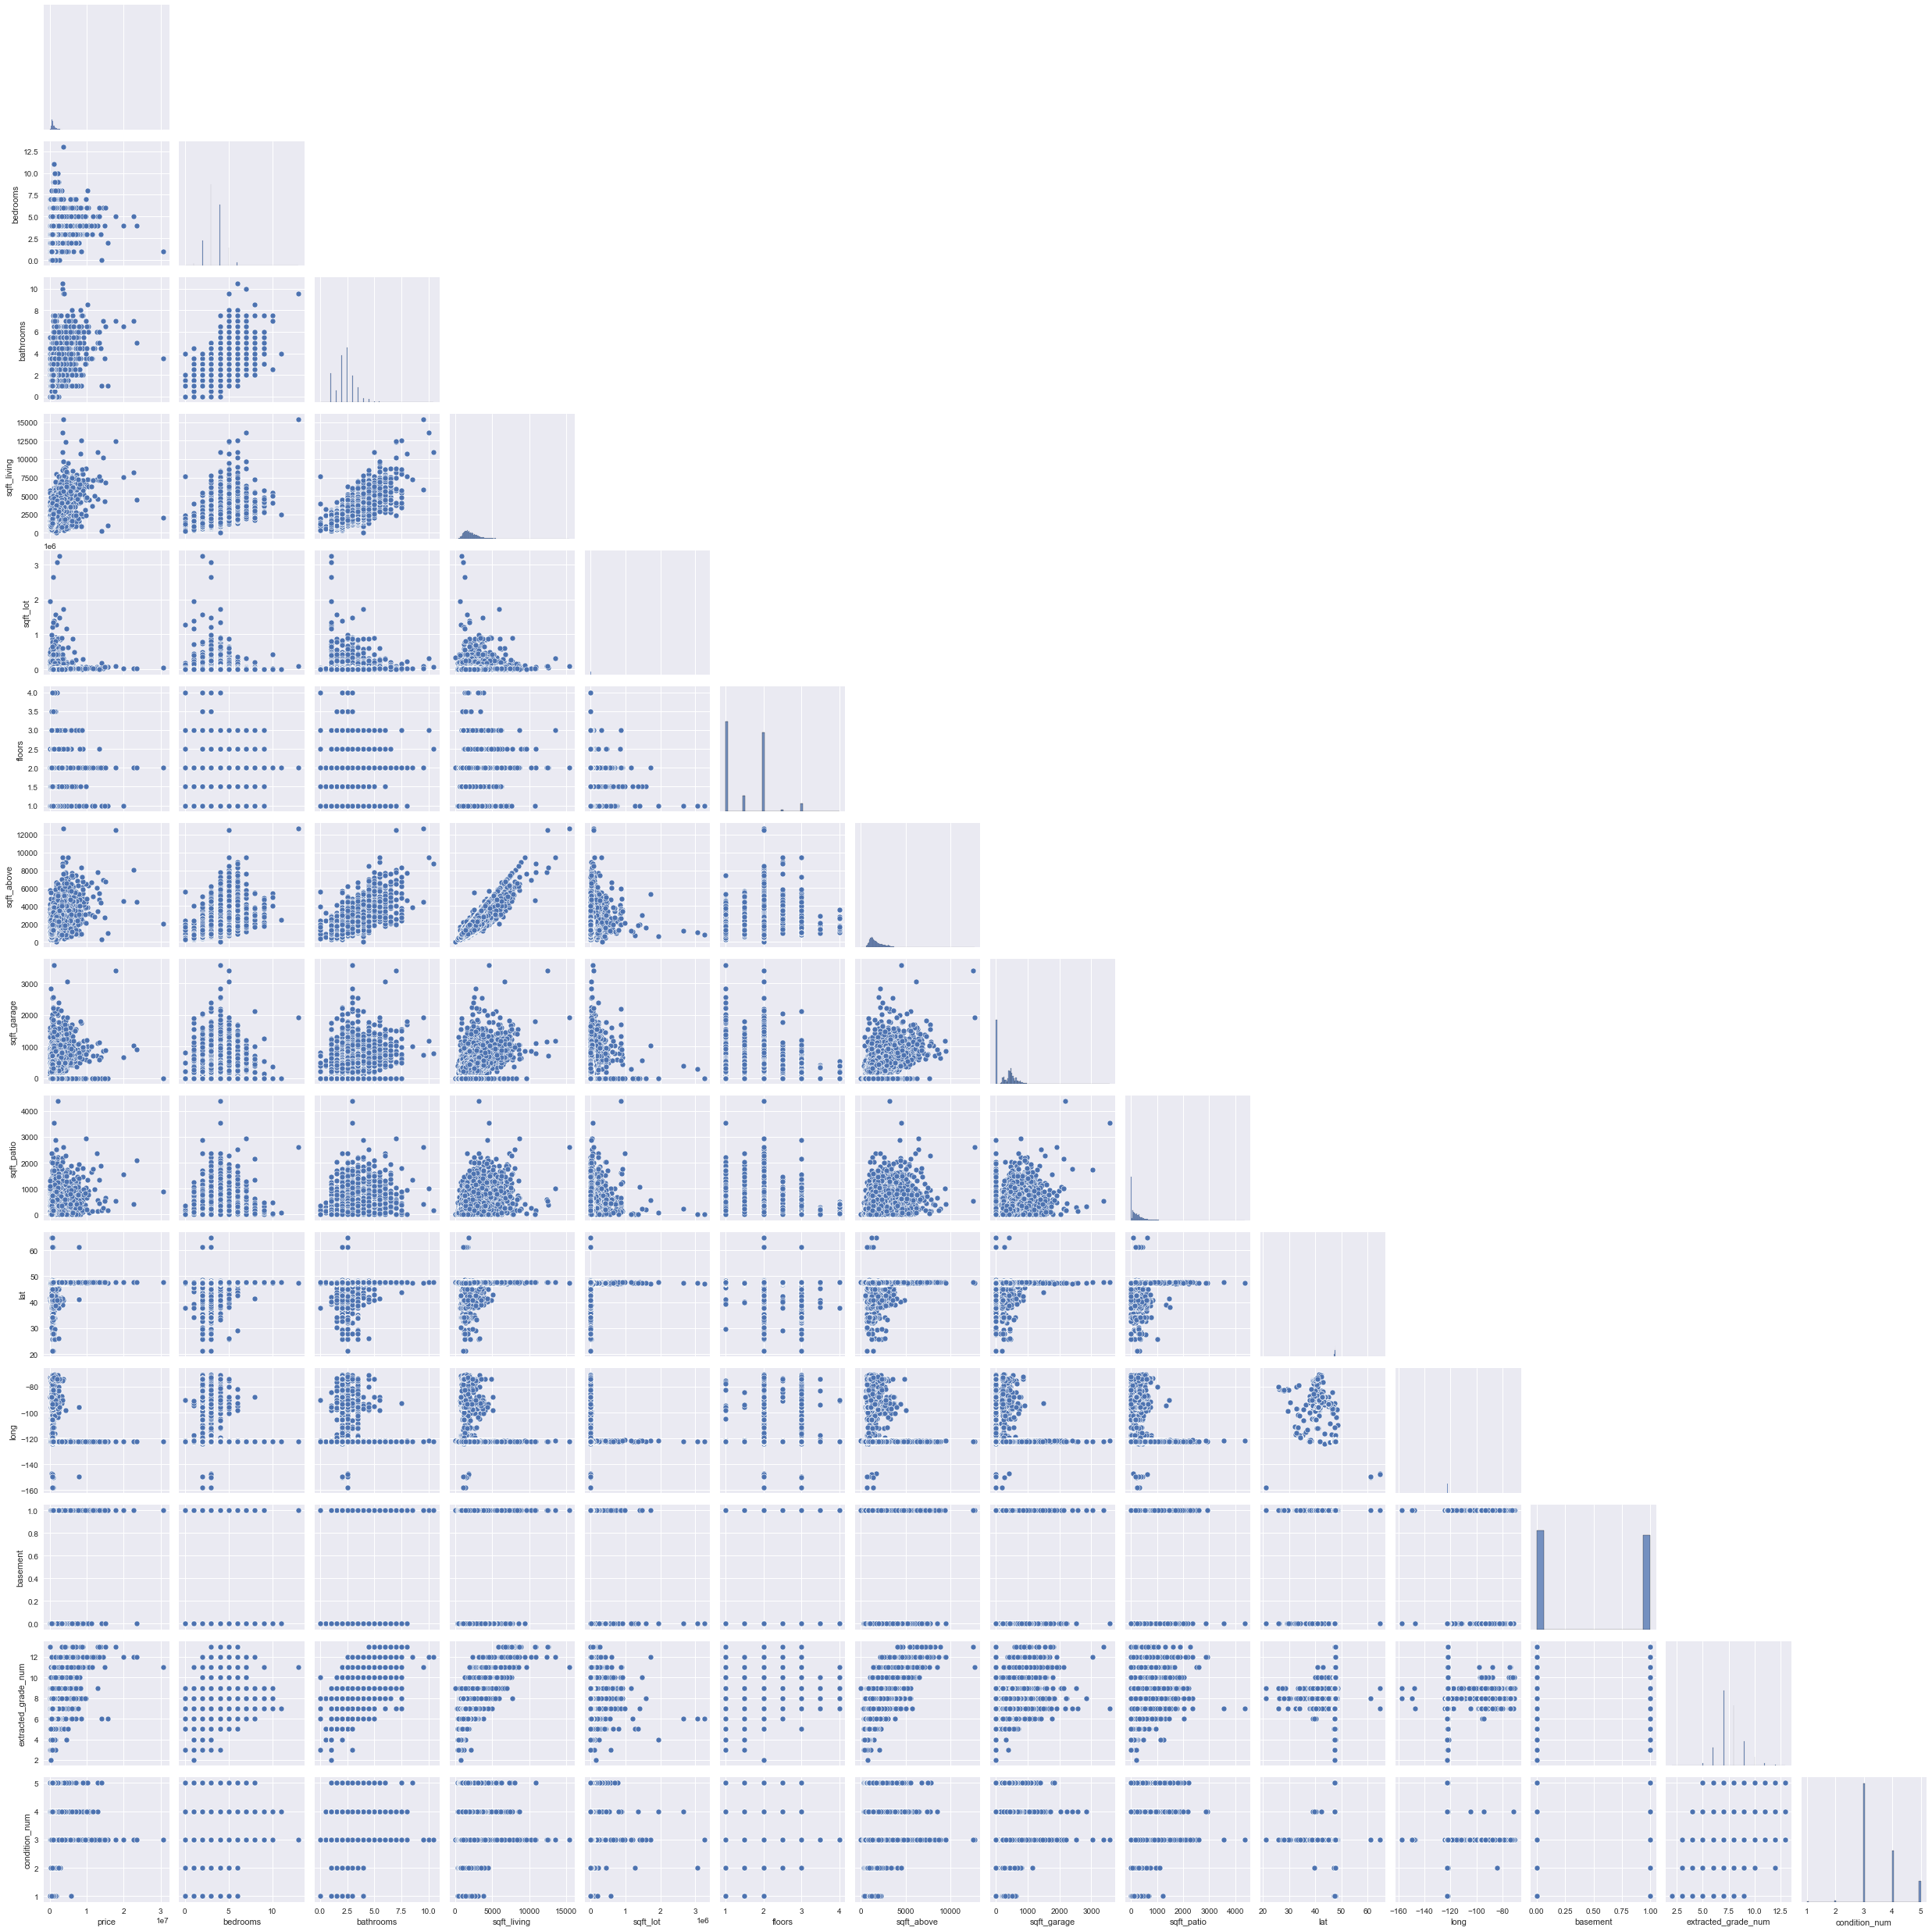

In [256]:
# Create a scatter plot matrix using seaborn
sns.pairplot(king, diag_kind='hist', corner=True)

**Observations:**
There is some degree of linearity for the following pairs that I think contribute most to a homes value:
* 'price vs sqft_above', 'price vs sqft_living', 
There seems to be a trend of increasing price for the following pairs:
* 'price vs bathrooms', 'price vs bedrooms', 'price vs extracted_grade_num', 'price vs garage', 'price vs patio', 'price vs basement'

We have two types of data in this dataset. There are categorical variables and continuous variables. Based off the descriptions and viewing the descriptions the following conclusion can be made:
1. continuous variables = price, sqft_living, sqft_above
2. categorical variables = bedrooms, bathrooms, floors, waterfront, condition, grade, sqft_lot, sqft_garage, sqft_patio

That being said lets split our data to view how they behave in respect to price which is our target variable. 

In [257]:
# split data into 2 groups of type continous and type categoricals.
# Add price to both groups to view correlations in respect to price.
continuous = ['price', 'sqft_living', 'sqft_above', 'sqft_patio', 'sqft_garage', 'sqft_lot']
categoricals = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'extracted_grade_num', 'condition_num']

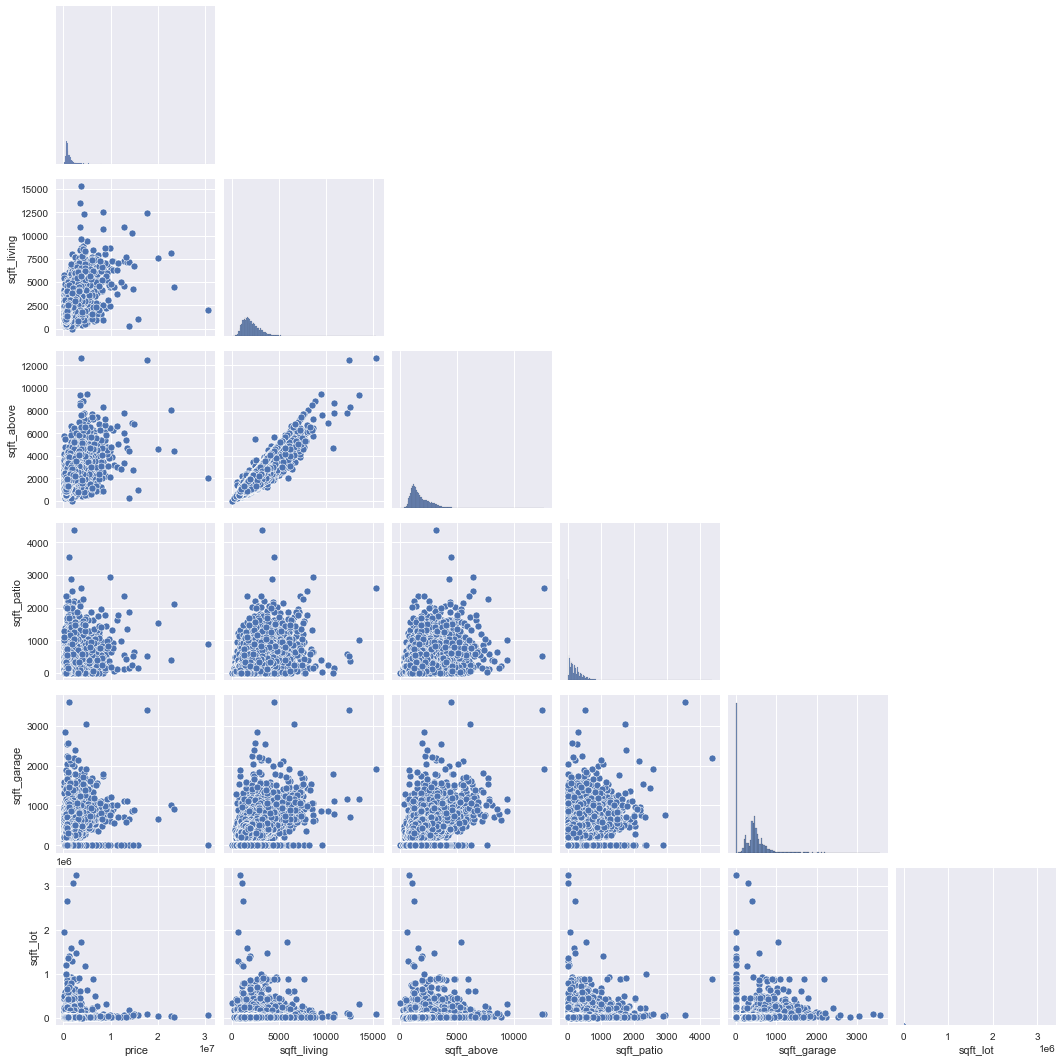

In [258]:
# Create a scatter plot matrix for continuous values
sns.pairplot(king[continuous], diag_kind='hist', corner=True)

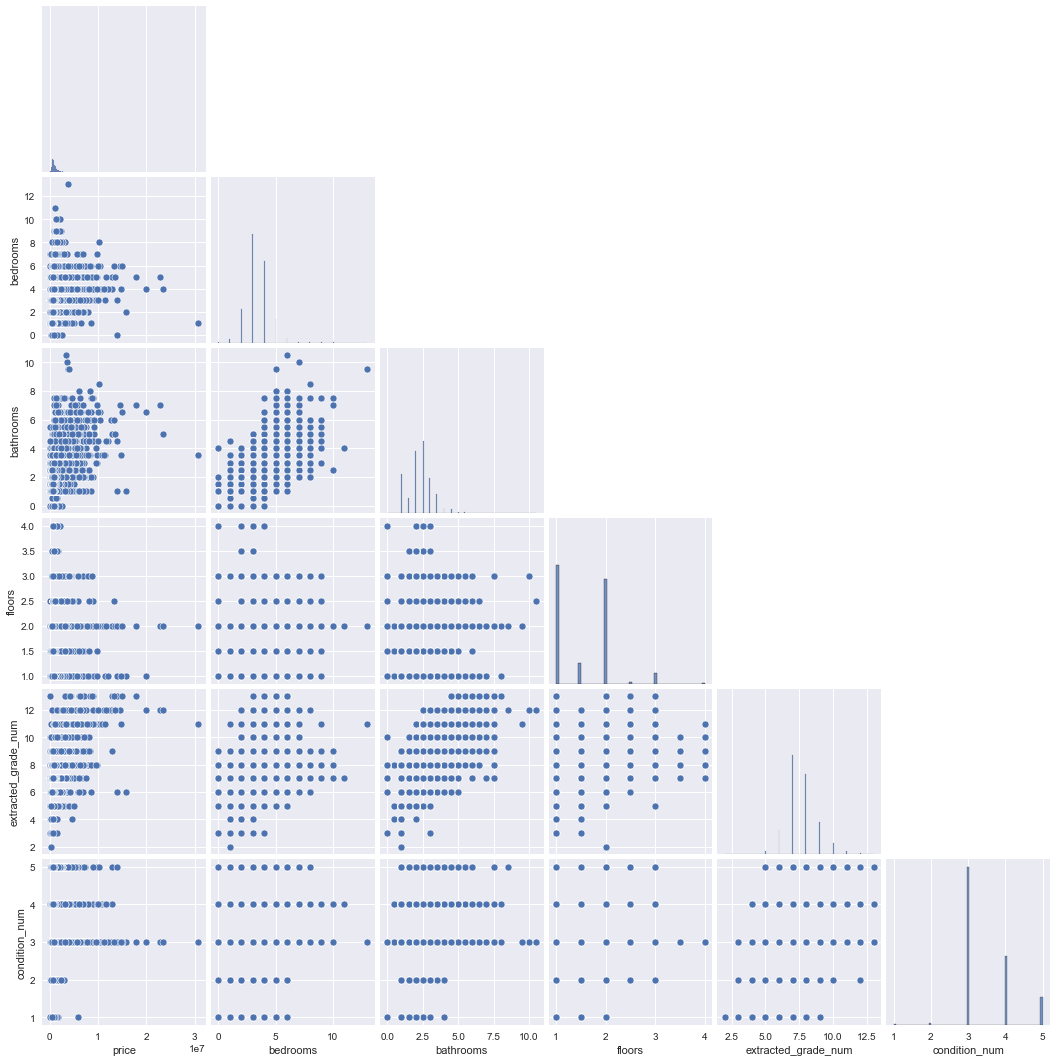

In [259]:
# Create a scatter plot matrix for categorical values using seaborn
sns.pairplot(king[categoricals], diag_kind = 'hist', corner = True)

View correlations matrix with respect to price

In [260]:
king.corr()['price']

price                  1.000000
bedrooms               0.288992
bathrooms              0.480284
sqft_living            0.608586
sqft_lot               0.086562
floors                 0.180555
sqft_above             0.538614
sqft_garage            0.263655
sqft_patio             0.313787
lat                    0.063419
long                  -0.022271
basement               0.103207
extracted_grade_num    0.566508
condition_num         -0.009563
Name: price, dtype: float64

# Factors to consider for each feature of a Home
We are looking at linearity of a feature with respect to 'price'. We should consider the following factors:

### **Skweness**
Skewness is the degree of distortion or deviation from the symmetrical normal distribution. Skewness can be seen as a measure to calculate the lack of symmetry in the data distribution. Skewness helps you identify extreme values in one of the tails. Symmetrical distributions have a skewness of 0.
* A distribution is positively skewed when the tail on the right side of the distribution is longer (also often called "fatter"). When there is positive skewness, the mean and median are bigger than the mode.
* Distributions are negatively skewed when the tail on the left side of the distribution is longer or fatter than the tail on the right side. When there is negative skewness, the mean and median are smaller than the mode.
* Skewness talks about extreme values in one tail 
* The "normality assumption" does not hold when data is skewed. When data is skewed, it must be transformed first in order to interpret that data.
#### When data is skewed use the following rules:
The rule of thumb seems to be:
* A skewness between -0.5 and 0.5 means that the data are pretty symmetrical
* A skewness between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed) means that the data are moderately skewed.
* A skewness smaller than -1 (negatively skewed) or bigger than 1 (positively skewed) means that the data are highly skewed.

![Skewness distributions](../images/Skewness_Image.png)

### **Kurtosis**
Kurtosis deals with the lengths of tails in the distribution. kurtosis aims at identifying extreme values in both tails at the same time. Kurtosis can be viewed as a measure of outliers present in the distribution.
#### Mesokurtic (kurtosis = 3) 
* Kurtosis statistics that lie close to the ones of a normal distribution. 
* Mesokurtic distributions have a kurtosis of around 3. According to this definition, the standard normal distribution has a kurtosis of 3.
#### Platykurtic (kurtosis < 3)
* The distribution is shorter and tails are thinner than the normal distribution. 
* The peak is lower and broader than Mesokurtic, which means that the tails are light and that there are fewer outliers than in a normal distribution.
#### Leptokurtic (kurtosis > 3)
* A distribution with longer and fatter tails. 
* The peak is higher and sharper than the peak of a normal distribution, which means that data have heavy tails and that there are more outliers.
* Outliers stretch your horizontal axis of the distribution, which means that the majority of the data appear in a narrower vertical range. That is why the leptokurtic distribution looks "skinny".

![Kurtosis distributions](../images/Kurtosis_types.png)

### **Pearson correlation**
* A value = 0 suggets no correlation between variables.
* A value closer to 0 implies weaker correlation between variables.
* A value closer to 1 implies stronger positive correlation between variables.
* A value closer to -1 implies stronger negative correlation between variables.

# What features in this dataset can be good predictors for the price of a home?
### Target Variable : Price

In [261]:
"""
Lets begin by observing basic statistics about the price itself. 
Observe if the price is skewed as well as its kurtosis. 
Viewing both can give us direction to determine how to deal with the price data. 
1. View skewness and Kurtosis values.
2. View a basic scatter plot of price and the number of prices/counts of each price.
3. Generate Q-Q plot to view normality of data. 
"""

'\nLets begin by observing basic statistics about the price itself. \nObserve if the price is skewed as well as its kurtosis. \nViewing both can give us direction to determine how to deal with the price data. \n1. View skewness and Kurtosis values.\n2. View a basic scatter plot of price and the number of prices/counts of each price.\n3. Generate Q-Q plot to view normality of data. \n'

In [262]:
# Generate summary statistics
king['price'].describe()

count    3.011000e+04
mean     1.108921e+06
std      8.964895e+05
min      2.736000e+04
25%      6.491180e+05
50%      8.600000e+05
75%      1.300000e+06
max      3.075000e+07
Name: price, dtype: float64

In [263]:
# Obtain skewness value
skewness = king['price'].skew()
print('Skewness_value: ', skewness)
# Obtain Kurtosis value
kurtosis = king['price'].kurtosis()
print('kurtosis_value: ', kurtosis)

Skewness_value:  6.608504428167346
kurtosis_value:  106.26296241029947


1. Overall the price data is very positively skewed and favors is skewed towards values in price closer to zero dollars. 
2. The kurtosis value suggests that the data in price is leptokurtic. This suggests that there is a large tail due to large outliers. This most likely indicates that there are homes that sold for millions of dollars more in higher class areas in this datasey which might be rare to sell. 

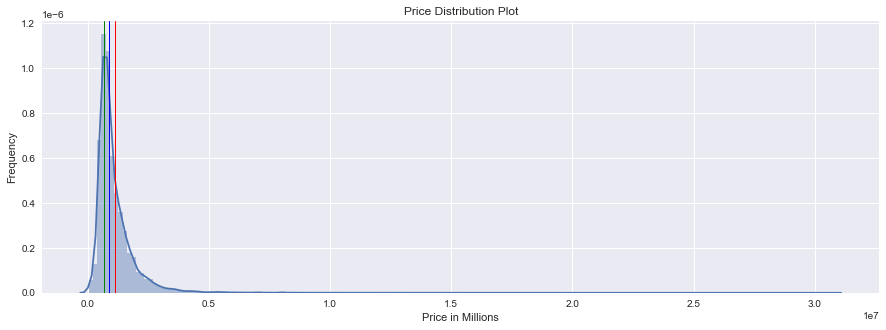

Text(0.5, 1.0, 'Price Qunatile-Quantile Plot')

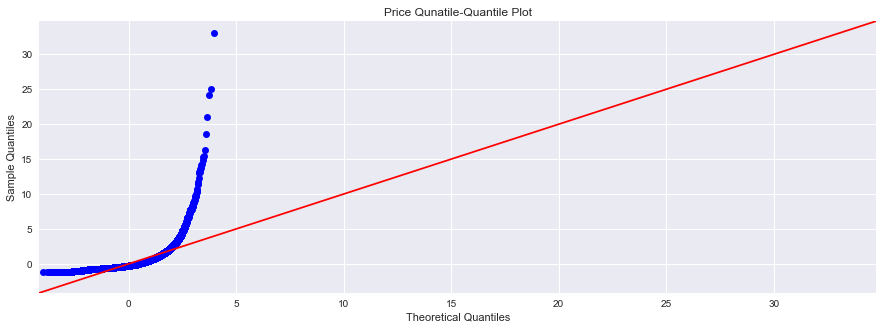

In [264]:
# Generate a distribution plot to view the price data. 
plt.figure(figsize=(15, 5))
sns.distplot(king['price'], bins=int(round(len(king['price'])**0.5)), kde=True)
plt.xlabel("Price in Millions")
plt.ylabel("Frequency")
plt.title("Price Distribution Plot")
plt.axvline(x=king['price'].mean(), linestyle="-", linewidth=1, color="r")
plt.axvline(x=king['price'].median(), linestyle="-", linewidth=1, color="b")
plt.axvline(x=king['price'].mode().iloc[0], linestyle="-", linewidth=1, color="g")
plt.xticks(fontsize = 10)
plt.show()

#check for normality
fig = sm.graphics.qqplot(king['price'], dist = stats.norm, line = '45', fit = True)
fig.set_size_inches(15, 5)
plt.title('Price Qunatile-Quantile Plot')

Clearly the price distribution does not follow a normal distribution and would require a transformation. Lets transform the price data by using log transformation to help with this. 

#### Observe and check for linearity with target variable of interest price_log with other features of a house.

The suspected continuos variables in this dataset are: 
* sqft_living
* sqft_above
* sqft_lot
* sqft_garage
* sqft_patio
* price

The suspected categoraical variables in this dataset are: 
* bedrooms
* bathrooms
* floors
* waterfront
* greenbelt
* nuisance
* view
* condition
* grade
* heat_source
* sewer_system
* yr_built
* yr_renovated
* garage

## Continuos Variables

#### Linearity check of Continuos variables

In [265]:
# View columns in dataset.
for col in king.columns:
    print(col)

date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
greenbelt
nuisance
grade
heat_source
sewer_system
sqft_above
sqft_garage
sqft_patio
yr_built
address
lat
long
basement
extracted_grade_num
condition_num


In [266]:
# define subset of continuous variables 
continuos = ["sqft_living", "sqft_above", "sqft_lot", "sqft_garage", "sqft_patio", "price"]

In [267]:
# Create a function that can return linearity information and geenrate disttribution plots and q-q plots
def linearity_check(data, list):
    """
    Function arguments are data=dataframe, target_var=target_variable to check target variable for linearity check. 
    Generates Q-Q plots and distribution plots as well an organized dataframe containing the skewness and kurtosis values of the variables in list.
    """
    result_df = pd.DataFrame(columns=['Variable', 'Skewness', 'Kurtosis'])
    
    for target in list:
    # Extracting the mean, median
        mean_value = data[target].mean()
        median_value = data[target].median()
        
        # Generate distribution plot with target variable
        plt.figure(figsize=(15, 5))
        sns.distplot(data[target], bins=int(round(len(data[target])**0.5)), kde=True)
        plt.xlabel(f"{target}")
        plt.ylabel("Frequency")
        plt.title(f"{target} Distribution Plot")
        plt.axvline(x=mean_value, linestyle="-", linewidth=1, color="r")
        plt.axvline(x=median_value, linestyle="-", linewidth=1, color="b")
        plt.xticks(fontsize = 10)
        plt.show()
        
        #check for normality in price_log
        fig = sm.graphics.qqplot(data[target], dist = stats.norm, line = '45', fit = True)
        fig.set_size_inches(15, 5)
        plt.title(f'{target} Quantile-Quantile Plot')
        
        # Generates skewness value
        skewness_value = data[target].skew()
        # Generates kurtosis value
        kurtosis_value = data[target].kurtosis()
        
        # Append to the result dataframe
        result_df = result_df.append({'Variable': target, 'Skewness': skewness_value, 'Kurtosis': kurtosis_value}, ignore_index=True)
    return result_df

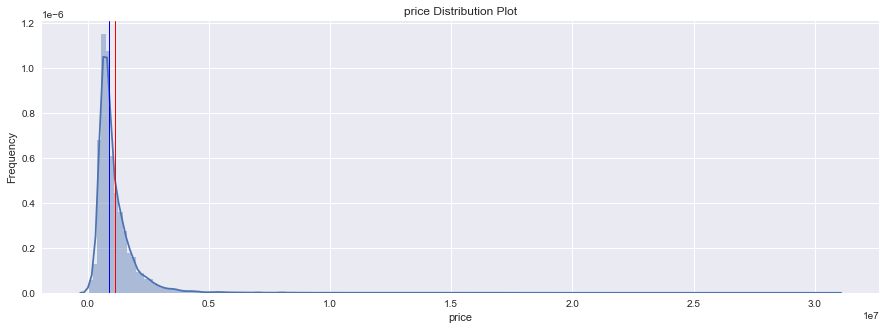

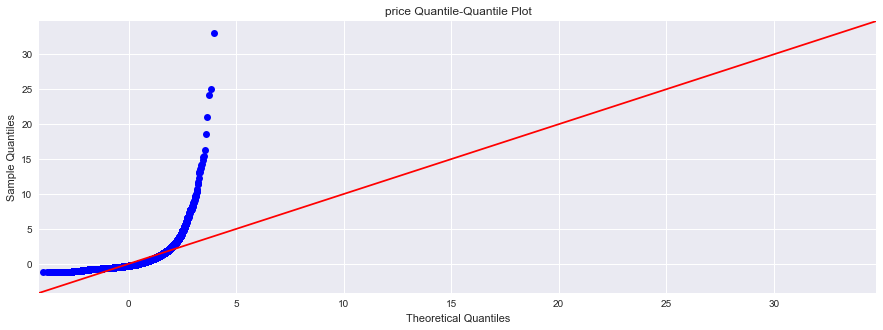

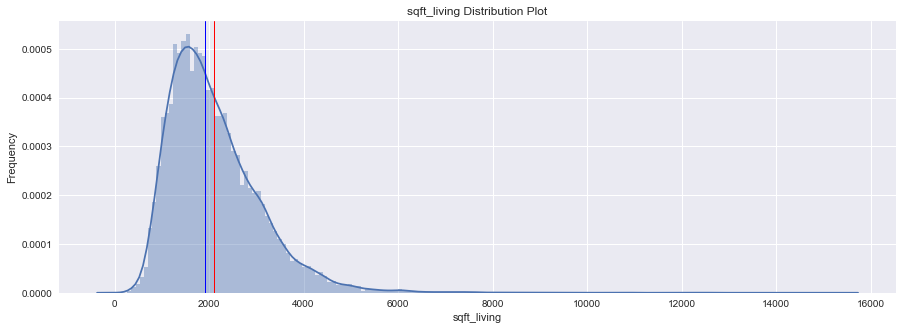

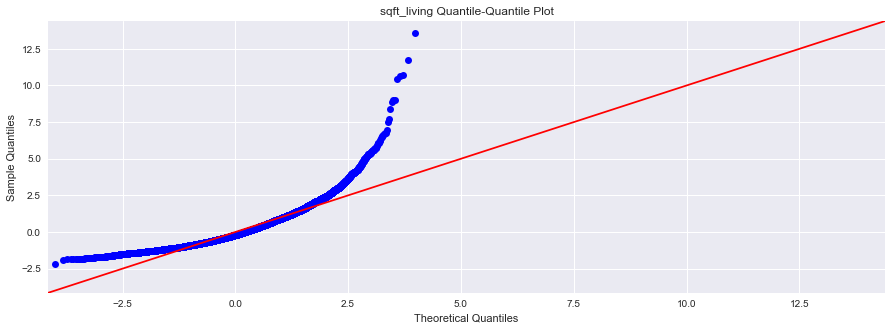

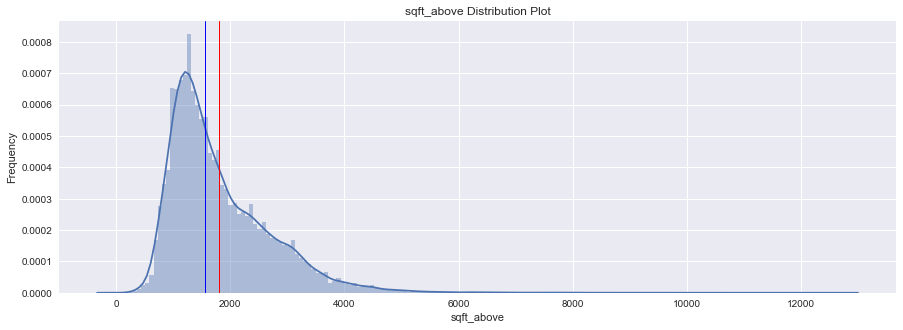

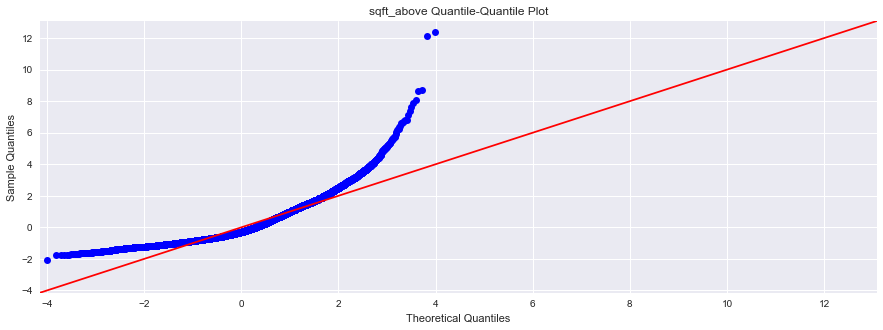

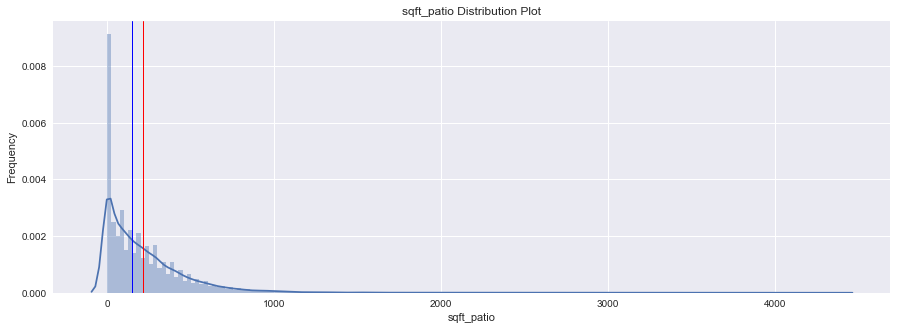

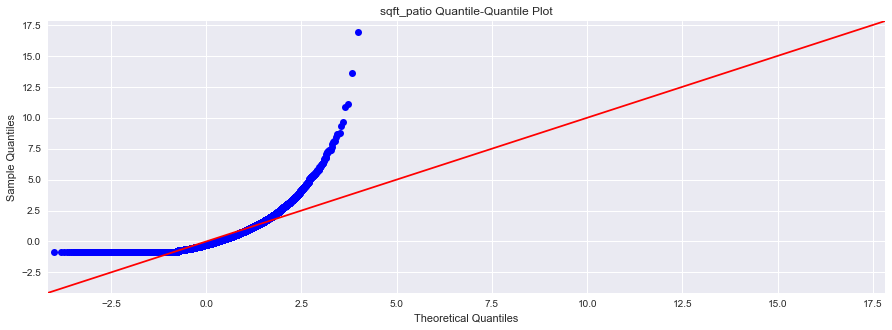

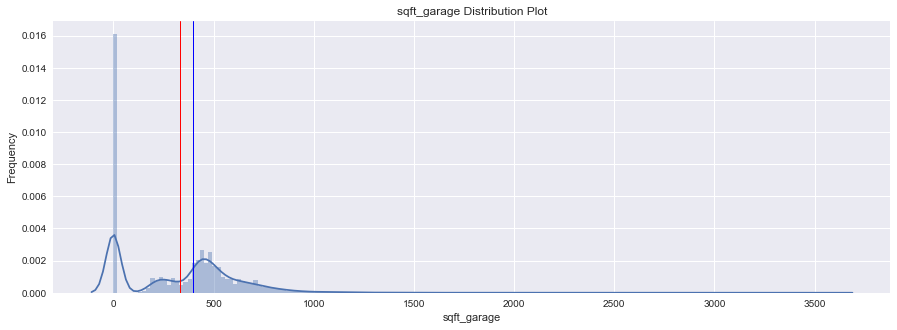

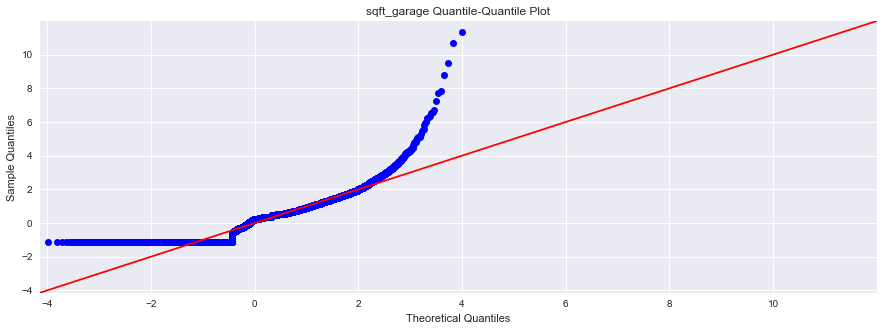

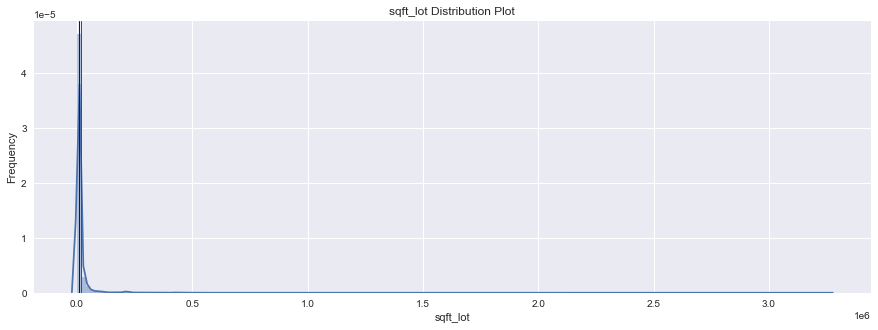

Variable   Skewness    Kurtosis
0        price   6.608504  106.262962
1  sqft_living   1.611730    6.720625
2   sqft_above   1.556087    4.811108
3   sqft_patio   2.346323   11.684839
4  sqft_garage   0.665554    2.145182
5     sqft_lot  21.277548  791.674133

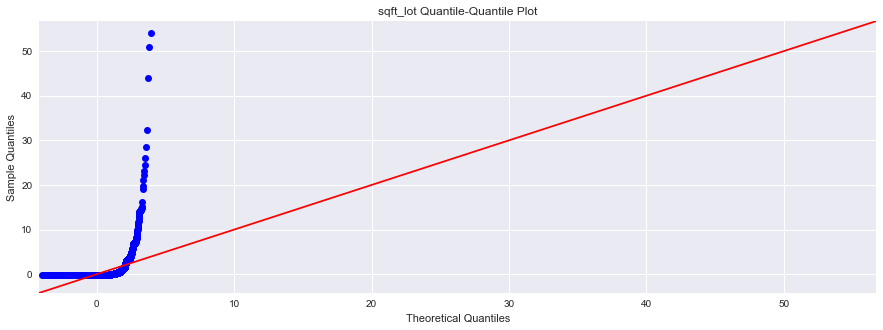

In [268]:
linearity_check(king, continuous)

**Observations**: 

Sqft_living:

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality.

sqft_above: 

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality.

sqft_lot: 

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality. It also seems that it has major outliers.

sqft_garage: 

> We can see how the data is positively skewed moderately. It is also Platykurtic. We can attempt a log transformation to bring the data closer norm. It also seems that not every home has a garage. Maybe it would be better to use this as an interaction term.

sqft_patio: 

> We can see how the skewness of the data is highly positively skewed. It is also Leptokurtic. We can attempt a log transformation to bring the data closer normality. It also seems that not every home has a patio. Maybe it would be better to use this as an interaction term.

#### Log Transformation for continuous variables. 

Before I convert all variables lets create a copy of the dataframe so we have a dataframe with only the continous variables transformed and the king df with price transformed only.

In [269]:
transformed_king = king.copy()

In [270]:
# Create a function that can transform the features into log[feature]. 
def transform(data, feature):
    """
    Takes in a dataset=data and a subset of columns=feature. 
    Function then transforms the features into log[feature] and appends a new column in the original dataframe. 
    """
    # import required libraries.
    import numpy as np
    # for loop iterating through columns in subset.
    for col in feature:
        data[f"{col}_log"] = np.log(data[col])

In [271]:
# Create a new subset because we don't want to transform the coordinates of the homes long and latitude 
# as well as the basement since we will be using it instead as a categorical variable.
subset = ["price", "sqft_living", "sqft_above", "sqft_lot", "sqft_garage", "sqft_patio"]

# Use log transformation function
transform(transformed_king, subset)

transformed_king.head(5)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
21177 2021-10-20   248448.0         3        1.5         1790     39808   
10844 2022-04-05   609000.0         4        1.5         2232     12866   
9292  2022-05-26  1020000.0         5        2.0         2760     15156   
17878 2022-01-03   610000.0         5        2.0         2420     15552   
14450 2022-03-09   700000.0         3        2.0         1720      8620   

       floors waterfront greenbelt nuisance  ...       long basement  \
21177     1.0         NO        NO       NO  ... -122.21875        0   
10844     1.5         NO        NO       NO  ... -122.21874        0   
9292      1.0         NO        NO       NO  ... -122.34868        1   
17878     1.0         NO        NO       NO  ... -122.24393        1   
14450     1.5         NO        NO       NO  ... -122.26385        0   

      extracted_grade_num  condition_num  price_log  sqft_living_log  \
21177                   7              4  12.422989         7.489971   
10844                   7              4  13.319574         7.710653   
9292                    8              4  13.835313         7.922986   
17878                   7              3  13.321214         7.791523   
14450                   7              5  13.458836         7.450080   

      sqft_above_log sqft_lot_log  sqft_garage_log  sqft_patio_log  
21177       7.489971    10.591823         6.131226        5.669881  
10844       7.710653     9.462343         6.086775        4.094345  
9292        7.229839     9.626152             -inf            -inf  
17878       7.098376     9.651945             -inf        5.799093  
14450       7.450080     9.061840             -inf            -inf  

[5 rows x 29 columns]

In [272]:
# Check for infinite values in the 'sqft_lot' column
lot_infinite = np.isinf(transformed_king['sqft_lot_log']).any()
garage_infinite = np.isinf(transformed_king['sqft_garage_log']).any()
patio_infinite = np.isinf(transformed_king['sqft_patio_log']).any()

print(f'It is {lot_infinite} that sqft_lot_log has infinite values')
print(f'It is {garage_infinite} that sqft_garage_log has infinite values')
print(f'It is {patio_infinite} that sqft_patio_log has infinite values')


It is False that sqft_lot_log has infinite values
It is True that sqft_garage_log has infinite values
It is True that sqft_patio_log has infinite values


In [273]:
print(king['sqft_garage'].value_counts())
print("")
print(king['sqft_lot'].value_counts())
print("")
print(king["sqft_patio"].value_counts())

0       9978
440     1397
480     1301
400      941
420      934
        ... 
40         1
807        1
1215       1
759        1
775        1
Name: sqft_garage, Length: 411, dtype: int64

5000      486
6000      402
4000      374
7200      302
7500      181
         ... 
12895       1
23138       1
387684      1
617         1
4098        1
Name: sqft_lot, Length: 12223, dtype: int64

0       6746
100      906
80       886
60       858
40       839
        ... 
445        1
182        1
509        1
102        1
3550       1
Name: sqft_patio, Length: 526, dtype: int64


Having infinite values can suggest that the feature we thought was continuos is actually an ordinal categorical feature. After viewing its values we can see how it actually has discrete values. There also seems to be homes without such features. Lets treat this feature as if a home has the feature just like basement. 

In [274]:
subset = ["price", "sqft_living", "sqft_above", "sqft_lot"]
transform(king, subset)
king.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
21177 2021-10-20   248448.0         3        1.5         1790     39808   
10844 2022-04-05   609000.0         4        1.5         2232     12866   
9292  2022-05-26  1020000.0         5        2.0         2760     15156   
17878 2022-01-03   610000.0         5        2.0         2420     15552   
14450 2022-03-09   700000.0         3        2.0         1720      8620   

       floors waterfront greenbelt nuisance  ...  \
21177     1.0         NO        NO       NO  ...   
10844     1.5         NO        NO       NO  ...   
9292      1.0         NO        NO       NO  ...   
17878     1.0         NO        NO       NO  ...   
14450     1.5         NO        NO       NO  ...   

                                                 address       lat       long  \
21177  1526 I Street Northeast, Auburn, Washington 98...  47.32178 -122.21875   
10844  1412 I Street Northeast, Auburn, Washington 98...  47.32083 -122.21874   
9292   1104 Southwest Shorebrook Drive, Normandy Park...  47.44375 -122.34868   
17878  7205 South 133rd Street, Seattle, Washington 9...  47.48387 -122.24393   
14450  5610 South 141st Street, Tukwila, Washington 9...  47.47707 -122.26385   

       basement  extracted_grade_num  condition_num  price_log  \
21177         0                    7              4  12.422989   
10844         0                    7              4  13.319574   
9292          1                    8              4  13.835313   
17878         1                    7              3  13.321214   
14450         0                    7              5  13.458836   

      sqft_living_log  sqft_above_log  sqft_lot_log  
21177        7.489971        7.489971     10.591823  
10844        7.710653        7.710653      9.462343  
9292         7.922986        7.229839      9.626152  
17878        7.791523        7.098376      9.651945  
14450        7.450080        7.450080      9.061840  

[5 rows x 27 columns]

In [275]:
king.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'grade', 'heat_source',
       'sewer_system', 'sqft_above', 'sqft_garage', 'sqft_patio', 'yr_built',
       'address', 'lat', 'long', 'basement', 'extracted_grade_num',
       'condition_num', 'price_log', 'sqft_living_log', 'sqft_above_log',
       'sqft_lot_log'],
      dtype='object')

In [276]:
subset = ["price", "sqft_living", "sqft_above", "sqft_lot"]
king.drop(labels=subset, axis=1, inplace=True)

Now that we have everything normalized lets check the corelations between variables and price using a matrix. 

In [277]:
def view_correlation(data, subset):
    # Add 'price' and 'price_log' to the subset list
    for col in subset:
        #plot 'price_log' vs. sqft_subset_log'
        plt.figure(figsize = (15, 5))
        sns.regplot(
            x = data[col],
            y = data['price_log'],
            data = data,
            scatter=True,
            fit_reg=True,
            color='red'
        )
        plt.title(f'{col} of The Home vs. Log Price')
        plt.xlabel(f'{col}')
        plt.ylabel('Log Price in Millions')
        plt.xticks(fontsize = 15)
        plt.show()
        
    corr_df = data[subset].corr()
    return corr_df

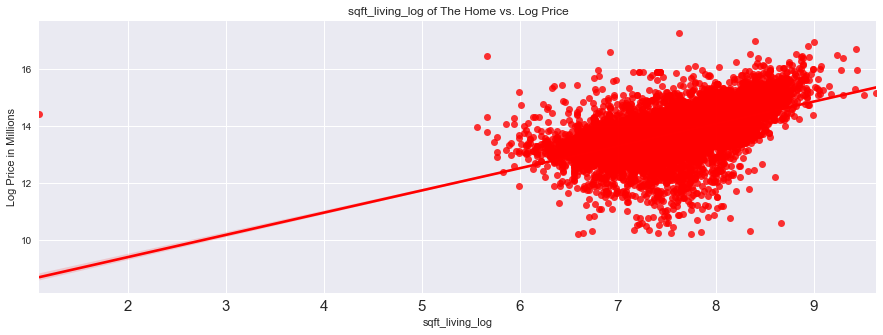

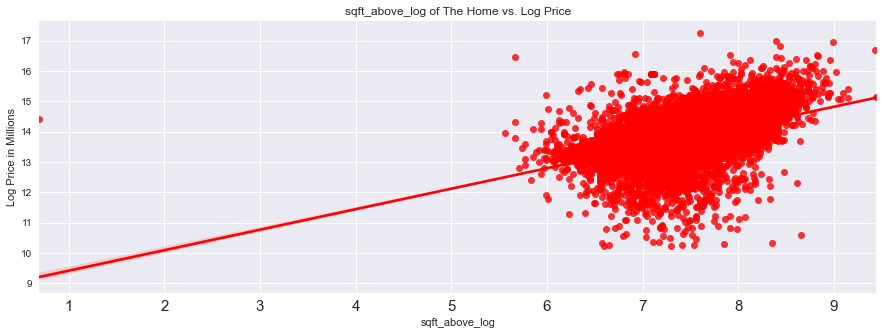

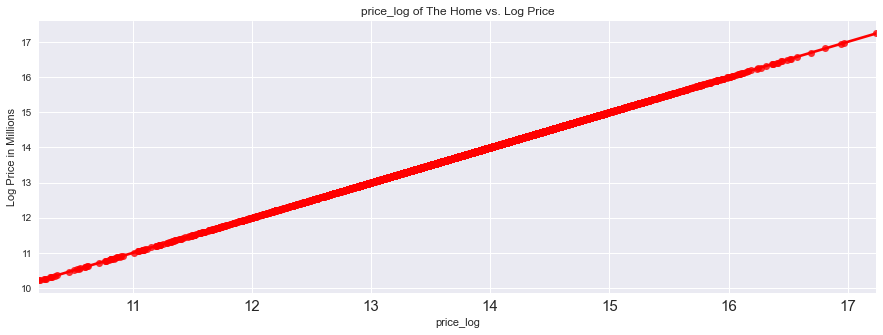

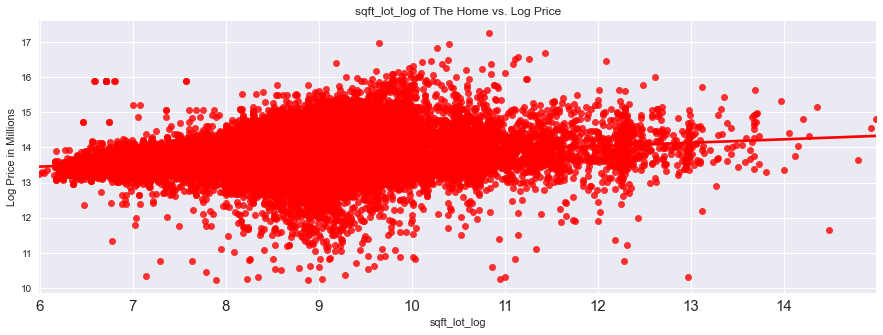

sqft_living_log  sqft_above_log  price_log  sqft_lot_log
sqft_living_log         1.000000        0.874526   0.591033      0.307858
sqft_above_log          0.874526        1.000000   0.522001      0.316209
price_log               0.591033        0.522001   1.000000      0.170734
sqft_lot_log            0.307858        0.316209   0.170734      1.000000

In [278]:
cont_subset = ["sqft_living_log", "sqft_above_log", "price_log", "sqft_lot_log"]
view_correlation(king, cont_subset)

**Observations:**
1. sqft_living_log and sqft_above_log are moderately positively correlated with price_log. 

## Exploring interactions with the Continuous variables:

Now that the continuos variables are explored and interpreted lets view the interactions of basement, patio, and garage with price

Lets first convert patio and garage to binary

In [279]:
king['garage'] = king['sqft_garage'].apply(lambda x: 1 if x > 0 else 0)
king['patio'] = king['sqft_patio'].apply(lambda x: 1 if x > 0 else 0)

# drop old columns
king.drop(labels=["sqft_garage", "sqft_patio"], axis=1, inplace=True)

Investigate interaction terms presence overall

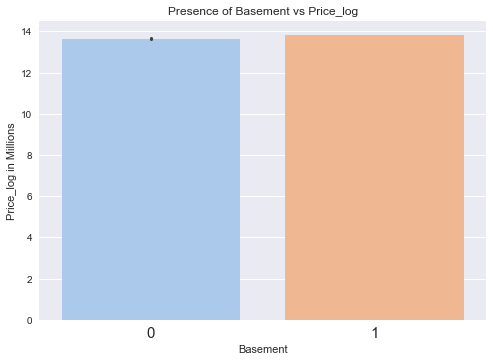

In [280]:
# Make a barplot of basement vs price
sns.barplot(x=king['basement'], 
            y=king['price_log'],
            palette="pastel",
            )
plt.title("Presence of Basement vs Price_log")
plt.xlabel("Basement")
plt.ylabel("Price_log in Millions")
plt.xticks(fontsize = 15)
plt.show()

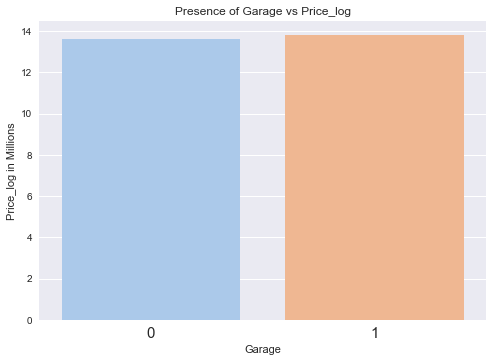

In [281]:
# Make a barplot of basement vs price
sns.barplot(x=king['garage'], 
            y=king['price_log'],
            palette="pastel",
            )
plt.title("Presence of Garage vs Price_log")
plt.xlabel("Garage")
plt.ylabel("Price_log in Millions")
plt.xticks(fontsize = 15)
plt.show()

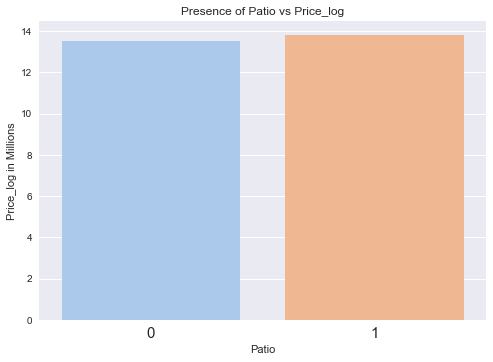

In [282]:
# Make a barplot of basement vs price
sns.barplot(x=king['patio'], 
            y=king['price_log'],
            palette="pastel",
            )
plt.title("Presence of Patio vs Price_log")
plt.xlabel("Patio")
plt.ylabel("Price_log in Millions")
plt.xticks(fontsize = 15)
plt.show()

**Observation:**
* It seems that having a basement, patio, or garage does not make much of a difference in price for homes. Regardless lets see it as an interaction term

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

def price_interactions(data, subset, interactions, palette='pastel', label_fontsize=15, title_fontsize=14):
    """
    data = dataframe, subset = subset of columns of interest, 
    interactions = subset of columns as an interaction term
    """
    num_plots = len(subset) * len(interactions)
    num_cols = len(subset)
    num_rows = len(interactions)
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 7, num_rows * 5))
    axes = axes.flatten()  # Convert axes to a 1-dimensional array
    
    for i, col in enumerate(subset):
        for j, interaction in enumerate(interactions):
            # Create a scatter plot with interaction term and target variable price_log
            ax = axes[j * num_cols + i]
            scatter = ax.scatter(
                data[col], 
                data['price_log'],
                c=data[interaction],
                cmap='viridis',
                alpha=0.5
            )
            ax.set_title(f'{col} vs. Log Price with Interaction feature {interaction}', fontsize=title_fontsize)
            ax.set_xlabel(f'{col}', fontsize=label_fontsize)
            ax.set_ylabel('Log Price in Millions', fontsize=label_fontsize)
            ax.tick_params(axis='both', labelsize=label_fontsize)
            
            # Create a colorbar for the scatter points
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label(interaction, fontsize=label_fontsize)
            cbar.ax.tick_params(labelsize=label_fontsize)
    
    # Remove any unused subplots if the number of plots is less than num_cols * num_rows
    for i in range(num_plots, num_cols * num_rows):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
    
    # Compute the correlation matrix between 'basement', 'price', and 'price_log'
    corr_matrix = data[subset + interactions + ['price_log']].corr()
    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
    plt.title('Correlation Matrix', fontsize=title_fontsize)
    plt.xlabel('Features', fontsize=label_fontsize)
    plt.ylabel('Features', fontsize=label_fontsize)
    plt.xticks(fontsize=label_fontsize)
    plt.yticks(fontsize=label_fontsize)
    plt.show()



In [284]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# def price_interactions(data, subset, interactions, palette='pastel', label_fontsize=15, title_fontsize=14):
#     """
#     data = dataframe, subset = subset of columns of interest, 
#     interactions = subset of columns as an interaction term
#     """
#     num_plots = len(subset) * len(interactions)
#     num_cols = len(subset)
#     num_rows = len(interactions)
    
#     fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 7, num_rows * 5))
#     axes = axes.flatten()  # Convert axes to a 1-dimensional array
    
#     for i, col in enumerate(subset):
#         for j, interaction in enumerate(interactions):
#             # Plot scatter plot with interaction term and target variable price_log
#             sns.scatterplot(
#                 data=data,
#                 x=col, 
#                 y='price_log',
#                 hue=interaction,
#                 palette=palette,
#                 cmap = 'plasma',
#                 alpha = 0.5,
#                 ax=axes[j * num_cols + i]  # Use the appropriate subplot for each plot
#             )
#             axes[j * num_cols + i].set_title(f'{col} of The Home vs. Log Price with Interaction feature {interaction}', fontsize=title_fontsize)
#             axes[j * num_cols + i].set_xlabel(f'{col}', fontsize=label_fontsize)
#             axes[j * num_cols + i].set_ylabel('Log Price in Millions', fontsize=label_fontsize)
#             axes[j * num_cols + i].tick_params(axis='both', labelsize=label_fontsize)
    
#     # Remove any unused subplots if the number of plots is less than num_cols * num_rows
#     for i in range(num_plots, num_cols * num_rows):
#         fig.delaxes(axes[i])
    
#     plt.tight_layout()
#     plt.show()
    
#     # Compute the correlation matrix between 'basement', 'price', and 'price_log'
#     corr_matrix = data[subset + interactions + ['price_log']].corr()
#     # Plot the correlation matrix as a heatmap
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
#     plt.title('Correlation Matrix', fontsize=title_fontsize)
#     plt.xlabel('Features', fontsize=label_fontsize)
#     plt.ylabel('Features', fontsize=label_fontsize)
#     plt.xticks(fontsize=label_fontsize)
#     plt.yticks(fontsize=label_fontsize)
#     plt.show()


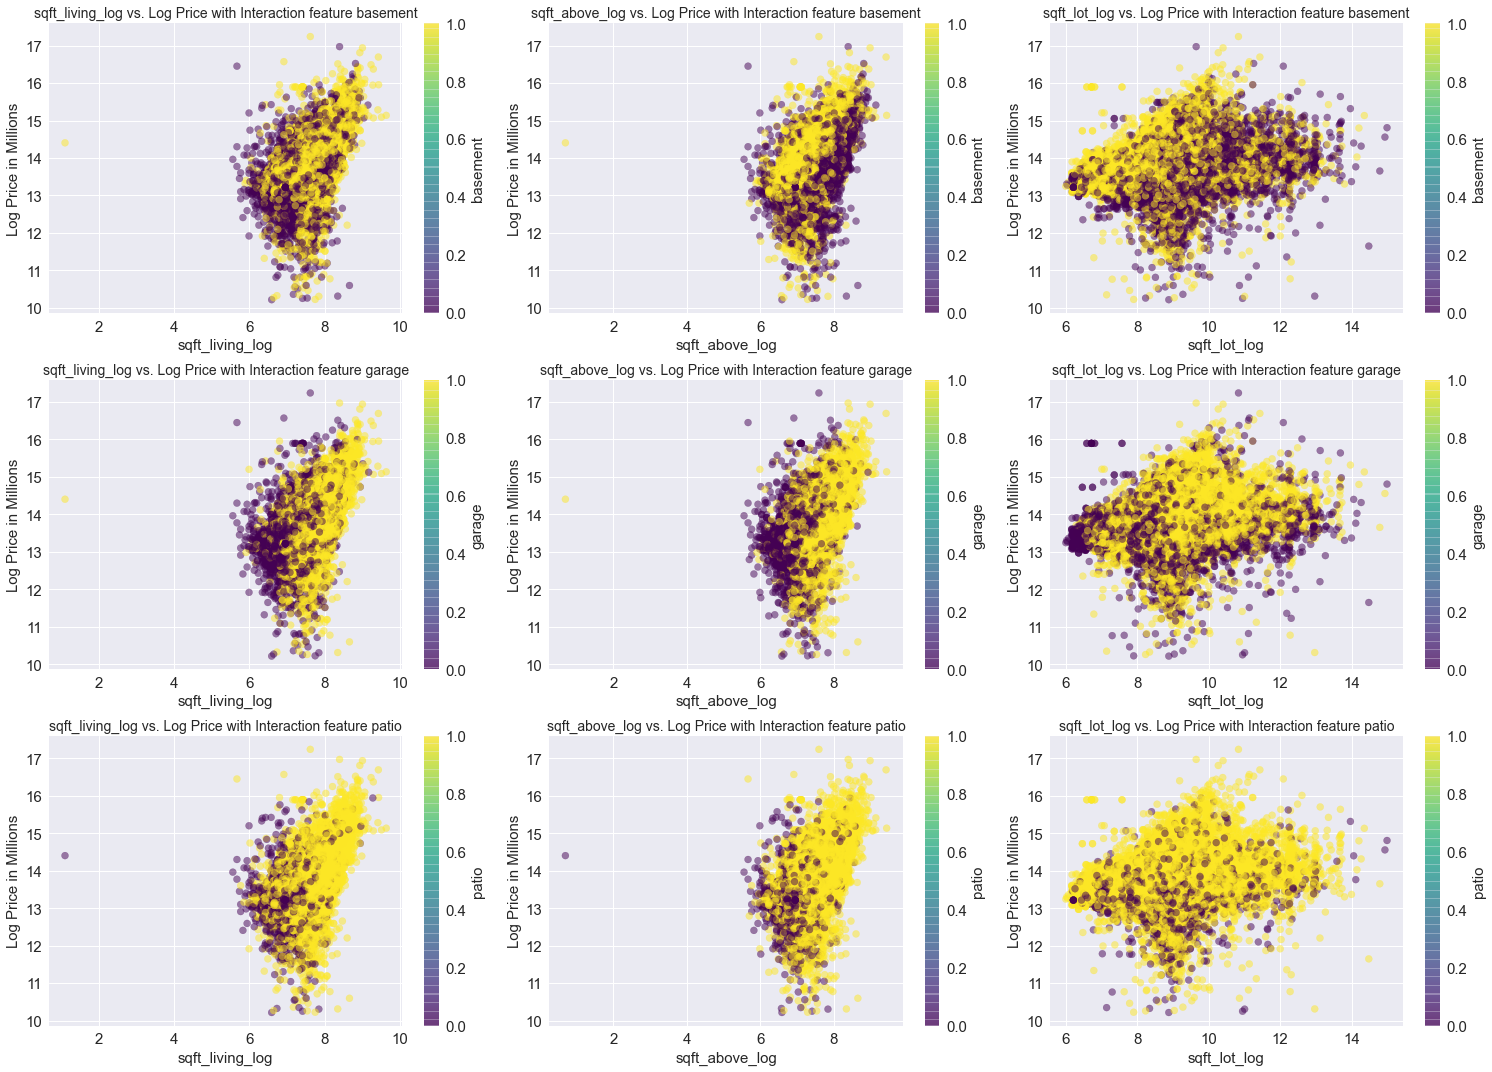

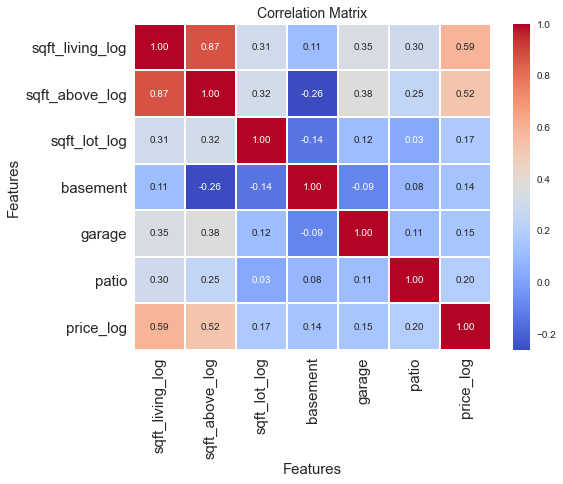

In [285]:
subset = ["sqft_living_log", "sqft_above_log", "sqft_lot_log"]
interactions = ["basement", "garage", "patio"]
price_interactions(king, subset, interactions)

**Observations:**
* Overall there seems to be an even split when it comes to if a home has a basement.
* According to the interaction scatter plots the presence of a basement can increase a home value to a small degree however, it is not a consistent indicator that it would outcompete a home with no basement. This can be seen with the correlations of basement with price_log.  
* basement does not appear to be highly correlated with price_log
* Overall there seems to be an even split for houses with a garage.
* According to the interaction scatter plots the presence of a garage can increase a homes value however, it is not a consistent indicator that it would outcompete a home with no garage. This can be seen with the correlations of garage with price_log.
* garage does not appear to be highly correlated with price_log. 
* Overall there seems to be more houses with a patio
* Again it is also not a consistent indicator that it would outcompete a home with no patio. 
* Patio is not highly correlated with price_log.

## Categorical variables

In [286]:
king.head()

date  bedrooms  bathrooms  floors waterfront greenbelt nuisance  \
21177 2021-10-20         3        1.5     1.0         NO        NO       NO   
10844 2022-04-05         4        1.5     1.5         NO        NO       NO   
9292  2022-05-26         5        2.0     1.0         NO        NO       NO   
17878 2022-01-03         5        2.0     1.0         NO        NO       NO   
14450 2022-03-09         3        2.0     1.5         NO        NO       NO   

           grade heat_source sewer_system  ...       long basement  \
21177  7 Average         Oil       PUBLIC  ... -122.21875        0   
10844  7 Average         Gas       PUBLIC  ... -122.21874        0   
9292      8 Good         Oil       PUBLIC  ... -122.34868        1   
17878  7 Average         Oil      PRIVATE  ... -122.24393        1   
14450  7 Average         Gas       PUBLIC  ... -122.26385        0   

       extracted_grade_num  condition_num  price_log  sqft_living_log  \
21177                    7              4  12.422989         7.489971   
10844                    7              4  13.319574         7.710653   
9292                     8              4  13.835313         7.922986   
17878                    7              3  13.321214         7.791523   
14450                    7              5  13.458836         7.450080   

       sqft_above_log  sqft_lot_log  garage  patio  
21177        7.489971     10.591823       1      1  
10844        7.710653      9.462343       1      1  
9292         7.229839      9.626152       0      0  
17878        7.098376      9.651945       0      1  
14450        7.450080      9.061840       0      0  

[5 rows x 23 columns]

In [287]:
"""
We need to convert our waterfront, greenbelt, nuisance to interpretable values rather than strings. Yes = 1 and No = 0. 
"""

'\nWe need to convert our waterfront, greenbelt, nuisance to interpretable values rather than strings. Yes = 1 and No = 0. \n'

In [288]:
# Creata a subset of columns needing data replacement 
columns_to_convert = ["greenbelt", "waterfront", "nuisance"]

# Create a dictionary to map 'YES' to 1 and 'NO' to 0
mapping = {'NO': 0, 'YES': 1}

# Iterate through each column in the list and perform the substitution
for col in columns_to_convert:
    king[col] = king[col].astype(str).replace(mapping).astype(int)
    # do the same for our transformed log dataset
    transformed_king[col] = transformed_king[col].astype(str).replace(mapping).astype(int)

In [289]:
for col in columns_to_convert:
    print(king[col].value_counts())
    print("")
    print(transformed_king[col].value_counts())

0    29338
1      772
Name: greenbelt, dtype: int64

0    29338
1      772
Name: greenbelt, dtype: int64
0    29599
1      511
Name: waterfront, dtype: int64

0    29599
1      511
Name: waterfront, dtype: int64
0    24861
1     5249
Name: nuisance, dtype: int64

0    24861
1     5249
Name: nuisance, dtype: int64


Now that we converted our values to zeros and ones we can start viewing relationships between our categorical variables and price.

In [290]:
for col in king.columns:
    print(col)

date
bedrooms
bathrooms
floors
waterfront
greenbelt
nuisance
grade
heat_source
sewer_system
yr_built
address
lat
long
basement
extracted_grade_num
condition_num
price_log
sqft_living_log
sqft_above_log
sqft_lot_log
garage
patio


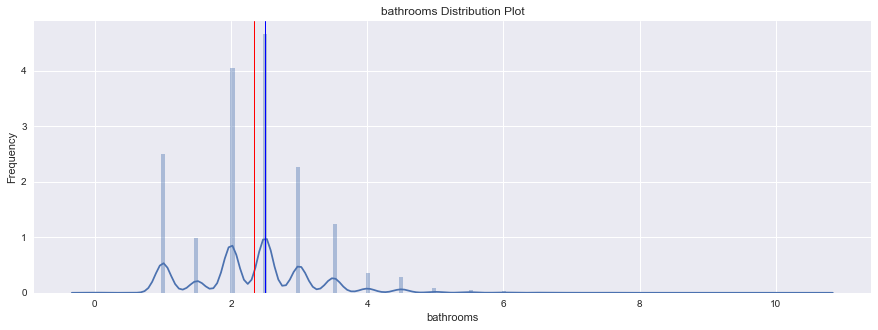

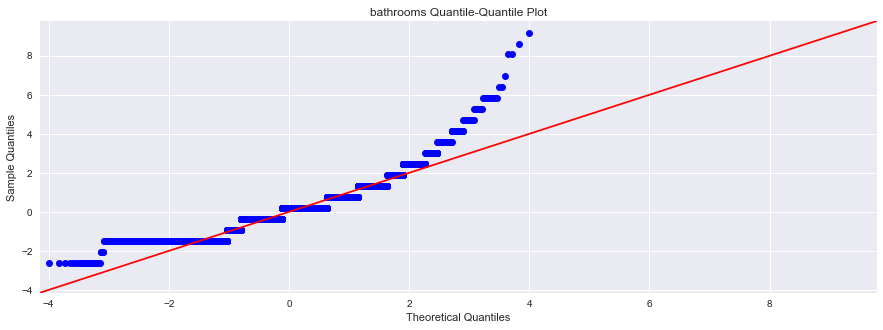

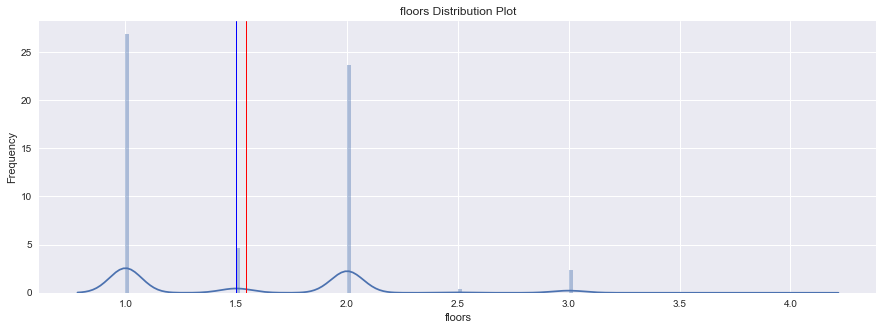

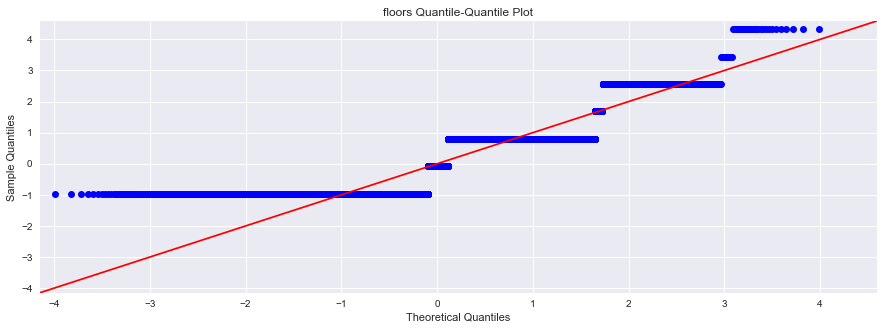

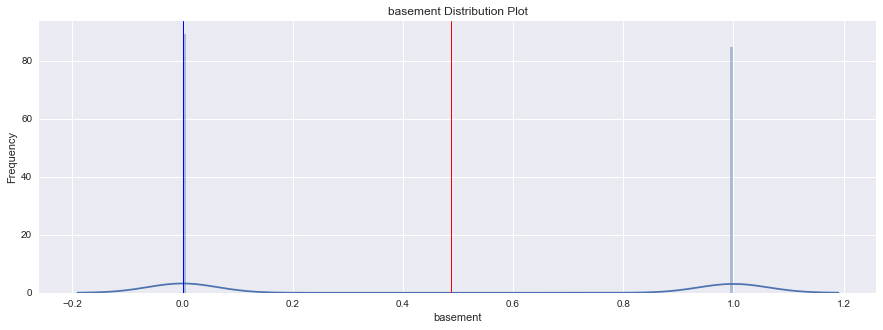

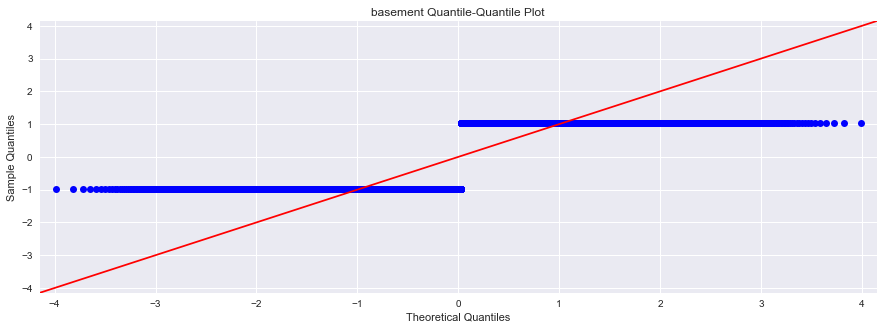

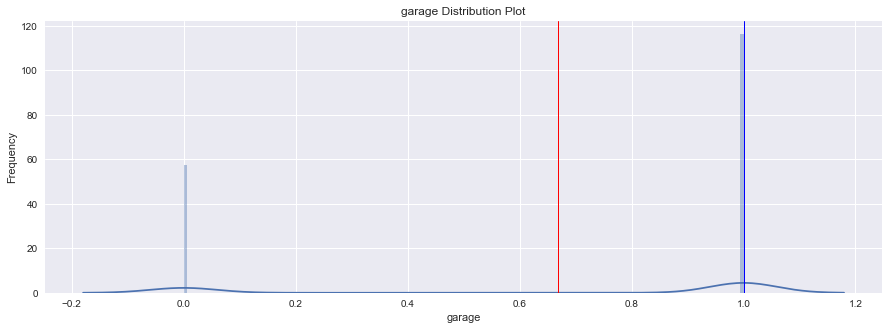

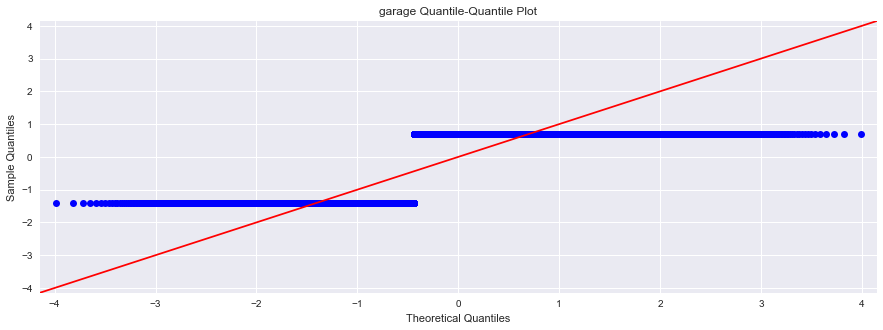

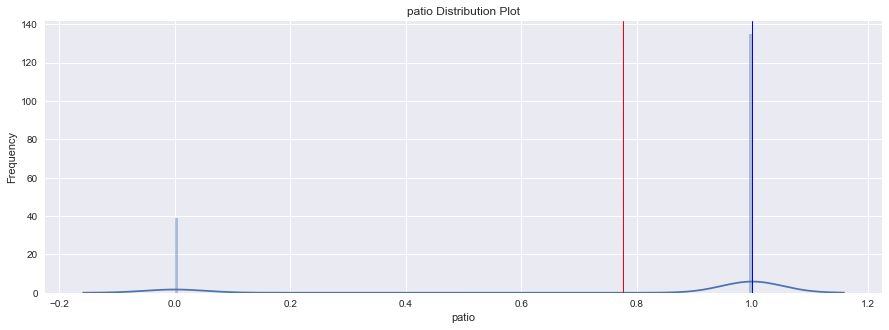

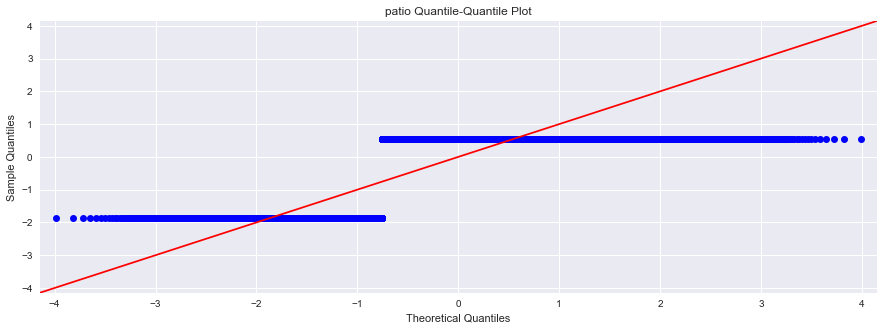

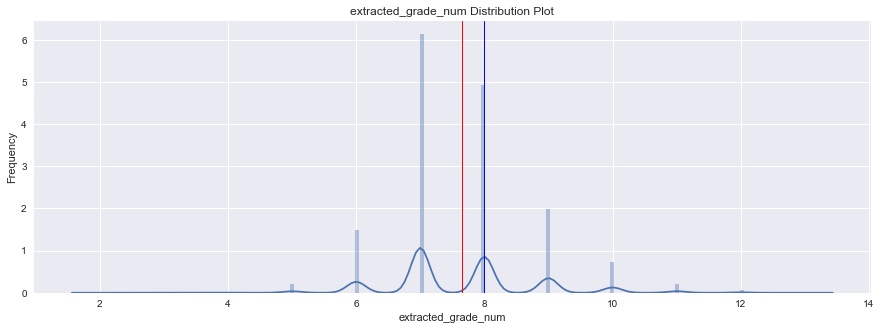

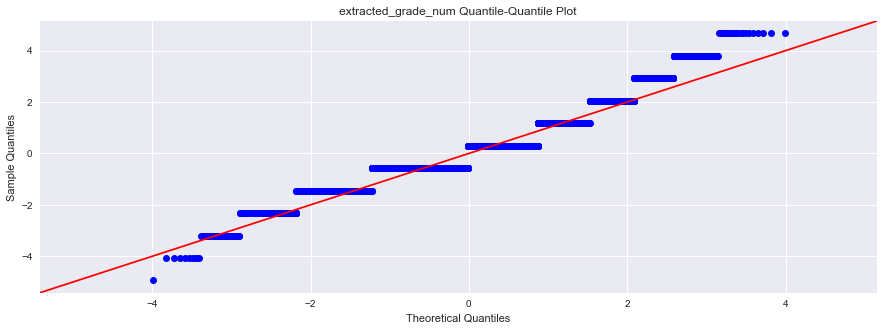

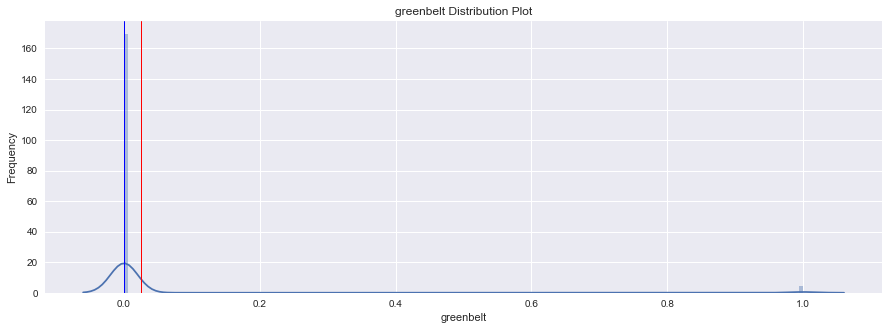

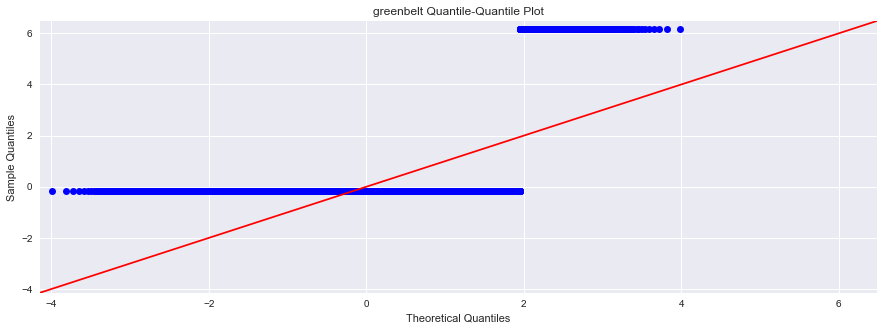

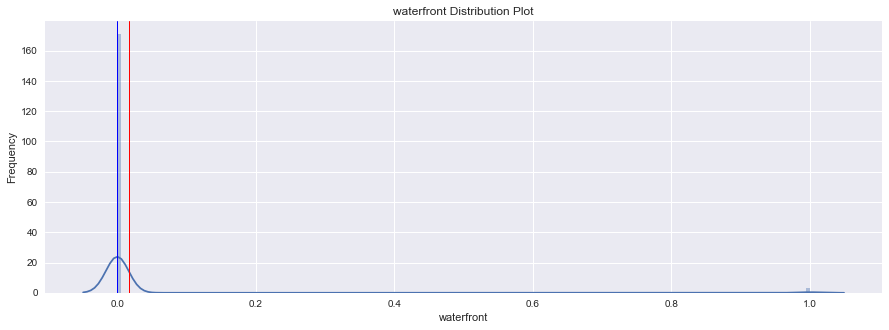

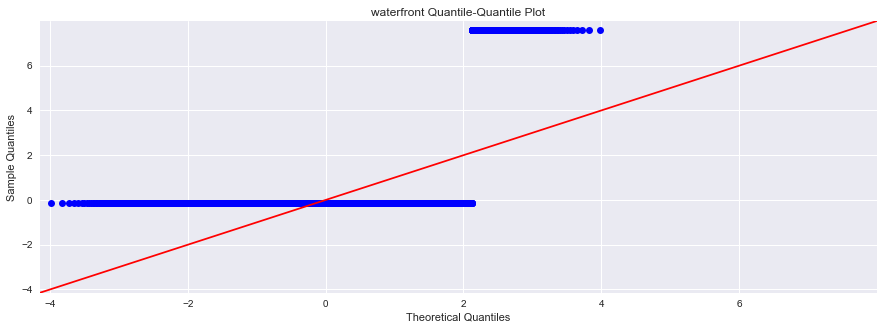

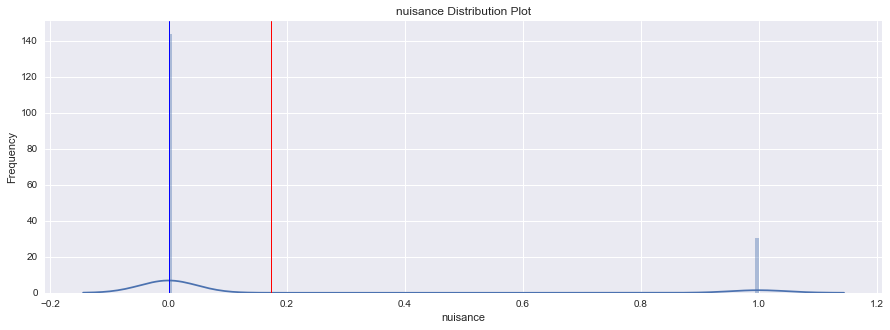

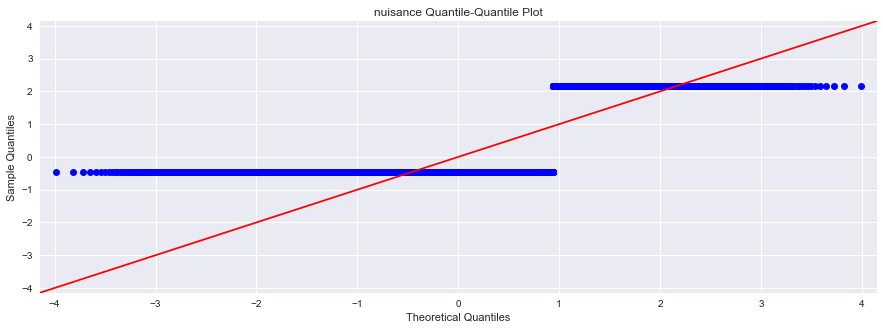

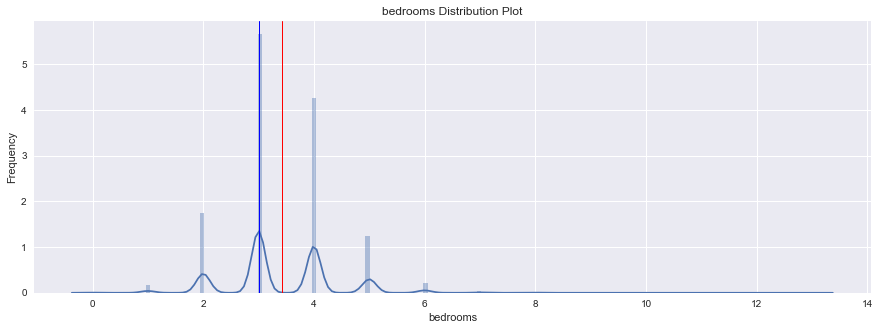

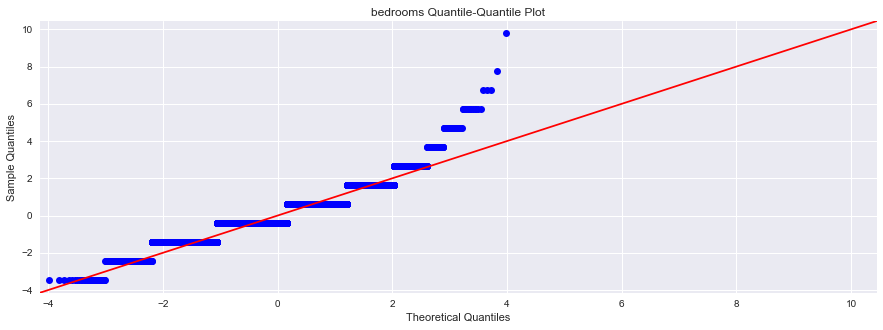

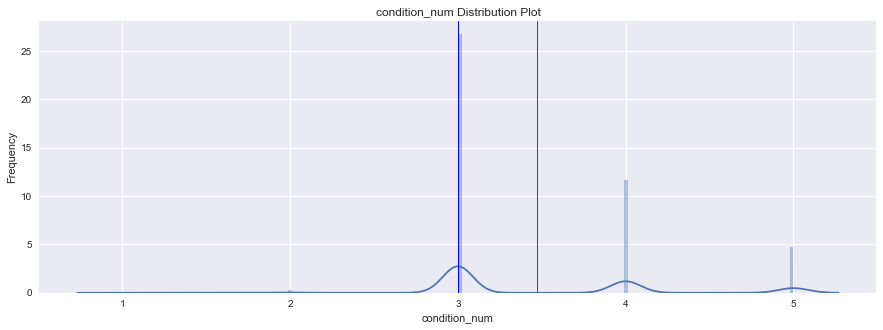

Variable  Skewness   Kurtosis
0             bathrooms  0.750023   2.436508
1                floors  0.626090  -0.206385
2              basement  0.050367  -1.997596
3                garage -0.716463  -1.486780
4                 patio -1.323743  -0.247721
5   extracted_grade_num  0.654239   1.338626
6             greenbelt  6.002707  34.034755
7            waterfront  7.479740  53.950101
8              nuisance  1.716904   0.947821
9              bedrooms  0.517018   1.916054
10        condition_num  0.884292   0.095475

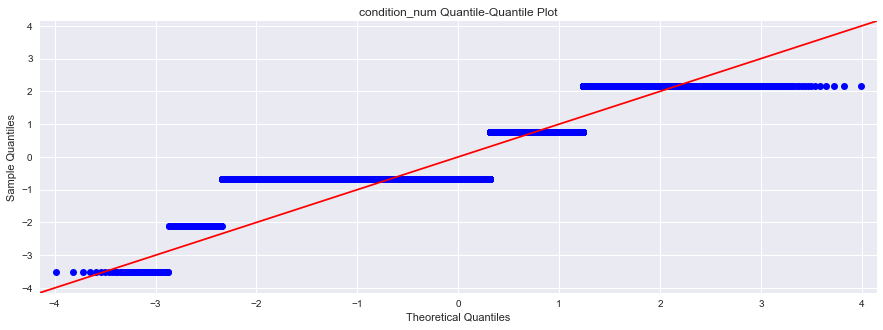

In [291]:
categoricals = ["bathrooms", "floors", "basement", "garage", "patio", "extracted_grade_num", "greenbelt", "waterfront", "nuisance", "bedrooms", "condition_num"]
linearity_check(king, categoricals)

**Observations:**
1. Most homes have 3 to 4 bedrooms, 2 to 3 bathrooms, no traffic noise (nuisance), are not adjacent to a green belt, and are not on a waterfront.  

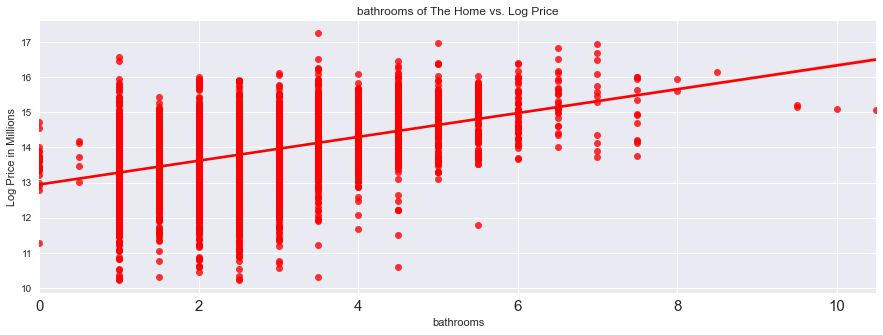

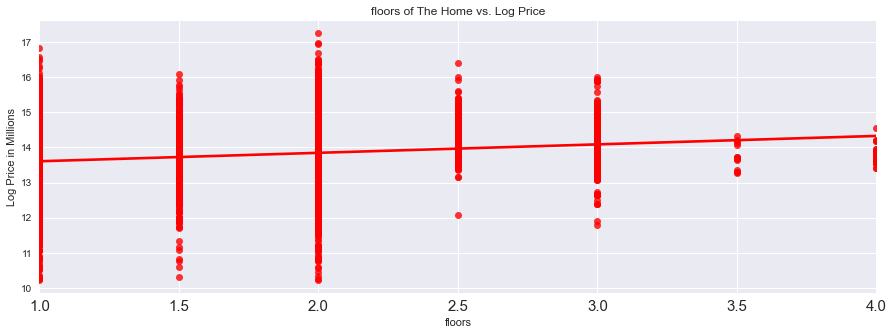

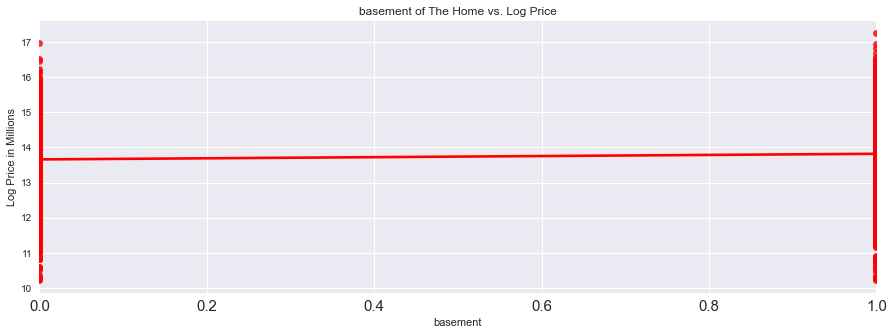

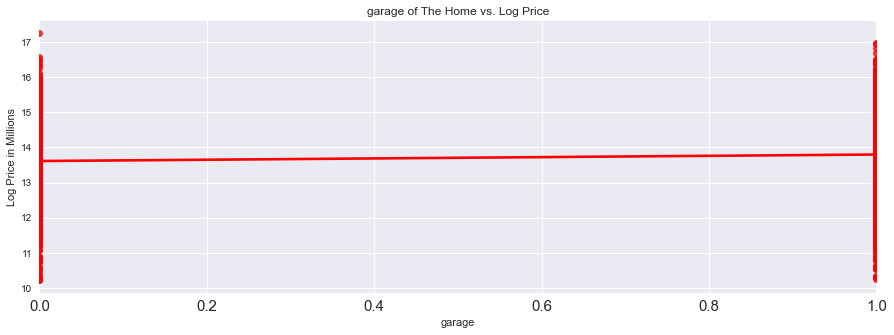

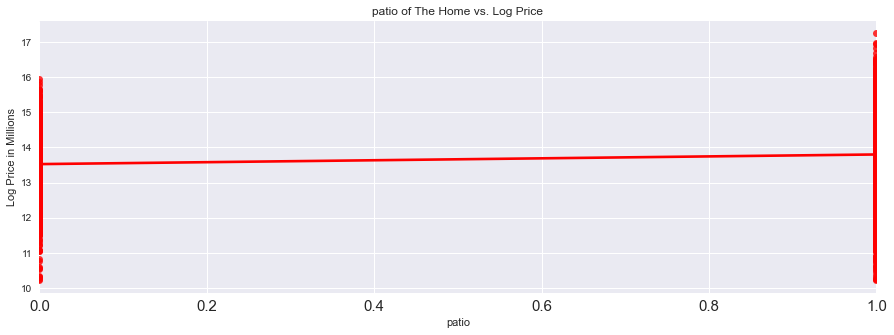

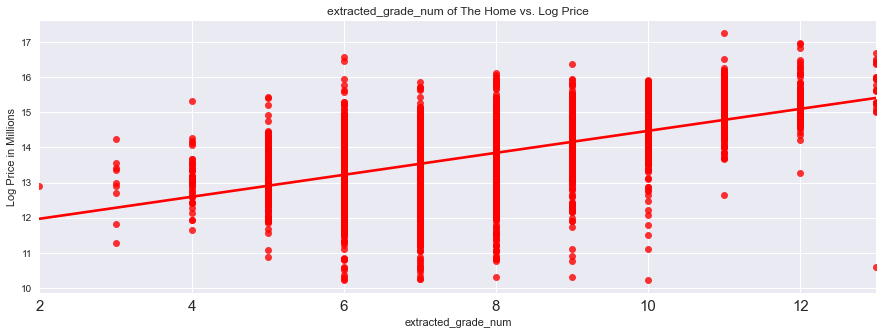

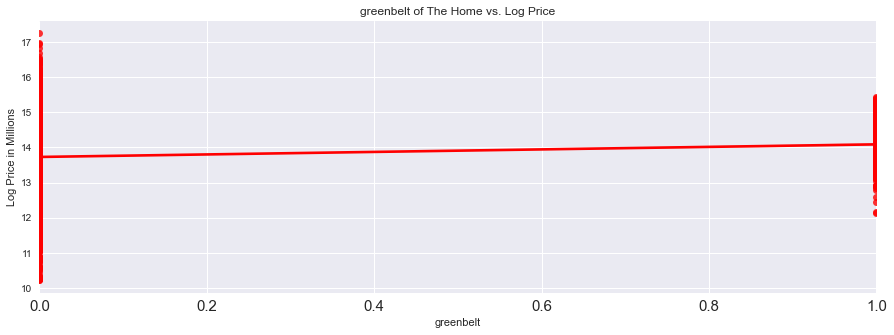

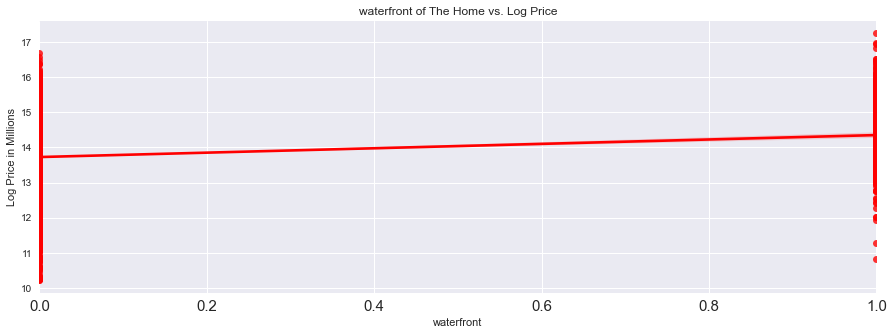

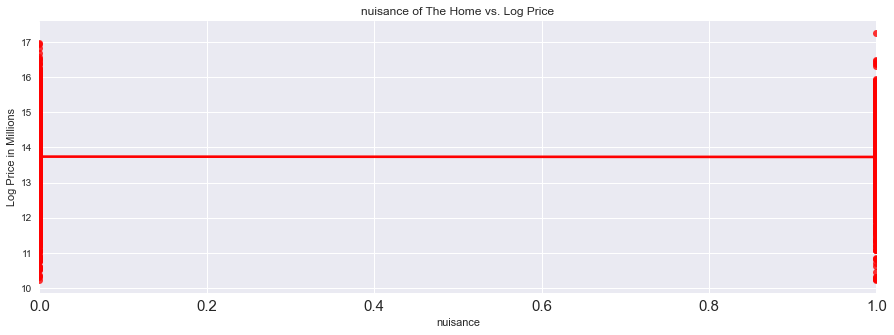

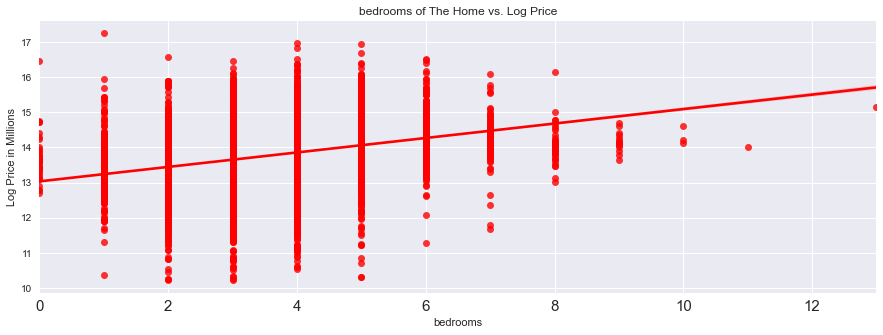

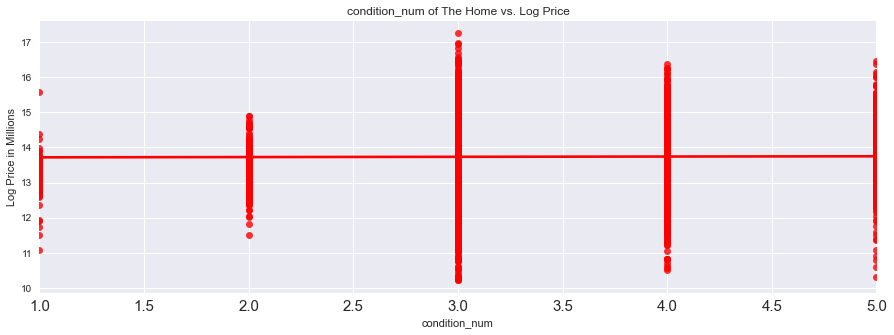

bathrooms    floors  basement    garage     patio  \
bathrooms             1.000000  0.404269  0.124920  0.337921  0.284836   
floors                0.404269  1.000000 -0.171647  0.099096  0.204033   
basement              0.124920 -0.171647  1.000000 -0.091695  0.084951   
garage                0.337921  0.099096 -0.091695  1.000000  0.107027   
patio                 0.284836  0.204033  0.084951  0.107027  1.000000   
extracted_grade_num   0.647023  0.465085  0.026580  0.337823  0.257533   
greenbelt             0.093886  0.065291 -0.051826  0.102149  0.054408   
waterfront            0.043996 -0.004177  0.014369 -0.060996  0.041618   
nuisance             -0.049902 -0.016232  0.109033 -0.139211 -0.050385   
bedrooms              0.588097  0.146884  0.069809  0.240166  0.165608   
condition_num        -0.066573 -0.282693  0.057693 -0.066578 -0.026990   

                     extracted_grade_num  greenbelt  waterfront  nuisance  \
bathrooms                       0.647023   0.093886    0.043996 -0.049902   
floors                          0.465085   0.065291   -0.004177 -0.016232   
basement                        0.026580  -0.051826    0.014369  0.109033   
garage                          0.337823   0.102149   -0.060996 -0.139211   
patio                           0.257533   0.054408    0.041618 -0.050385   
extracted_grade_num             1.000000   0.120098    0.047592 -0.060768   
greenbelt                       0.120098   1.000000   -0.019687 -0.052937   
waterfront                      0.047592  -0.019687    1.000000  0.008078   
nuisance                       -0.060768  -0.052937    0.008078  1.000000   
bedrooms                        0.371892   0.065296   -0.029701 -0.049985   
condition_num                  -0.157484  -0.029221    0.005001 -0.021464   

                     bedrooms  condition_num  
bathrooms            0.588097      -0.066573  
floors               0.146884      -0.282693  
basement             0.069809       0.057693  
garage               0.240166      -0.066578  
patio                0.165608      -0.026990  
extracted_grade_num  0.371892      -0.157484  
greenbelt            0.065296      -0.029221  
waterfront          -0.029701       0.005001  
nuisance            -0.049985      -0.021464  
bedrooms             1.000000       0.033817  
condition_num        0.033817       1.000000

In [292]:
view_correlation(king, categoricals)

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns

def categorical_bar(data, subset):
    # Determine the col and rows for figure
    num_features = len(subset)
    n_rows = (num_features + 1) // 2
    n_cols = 2 if num_features > 1 else 1

    # Create subplots with the specified number of rows and columns
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 20))

    # Flatten the axes array to access each subplot individually
    axes = axes.flatten()

    for i, col in enumerate(subset):
        # Select the appropriate subplot
        ax = axes[i] if i < num_features else axes[-1]
        # Create subplot bar graph
        sns.barplot(x=data[col], y=data['price_log'], palette="pastel", ax=ax)
        ax.set_title(f"{col} vs Price_log")
        ax.set_xlabel(f"{col}")
        ax.set_ylabel("Price_log in Millions")
        ax.tick_params(axis='x', labelrotation=0)
    
    # Remove any extra empty subplots
    for j in range(num_features, n_rows * n_cols):
        fig.delaxes(axes[j])
    
    # Adjust layout to prevent overlapping titles and axes
    plt.tight_layout()
    plt.show()

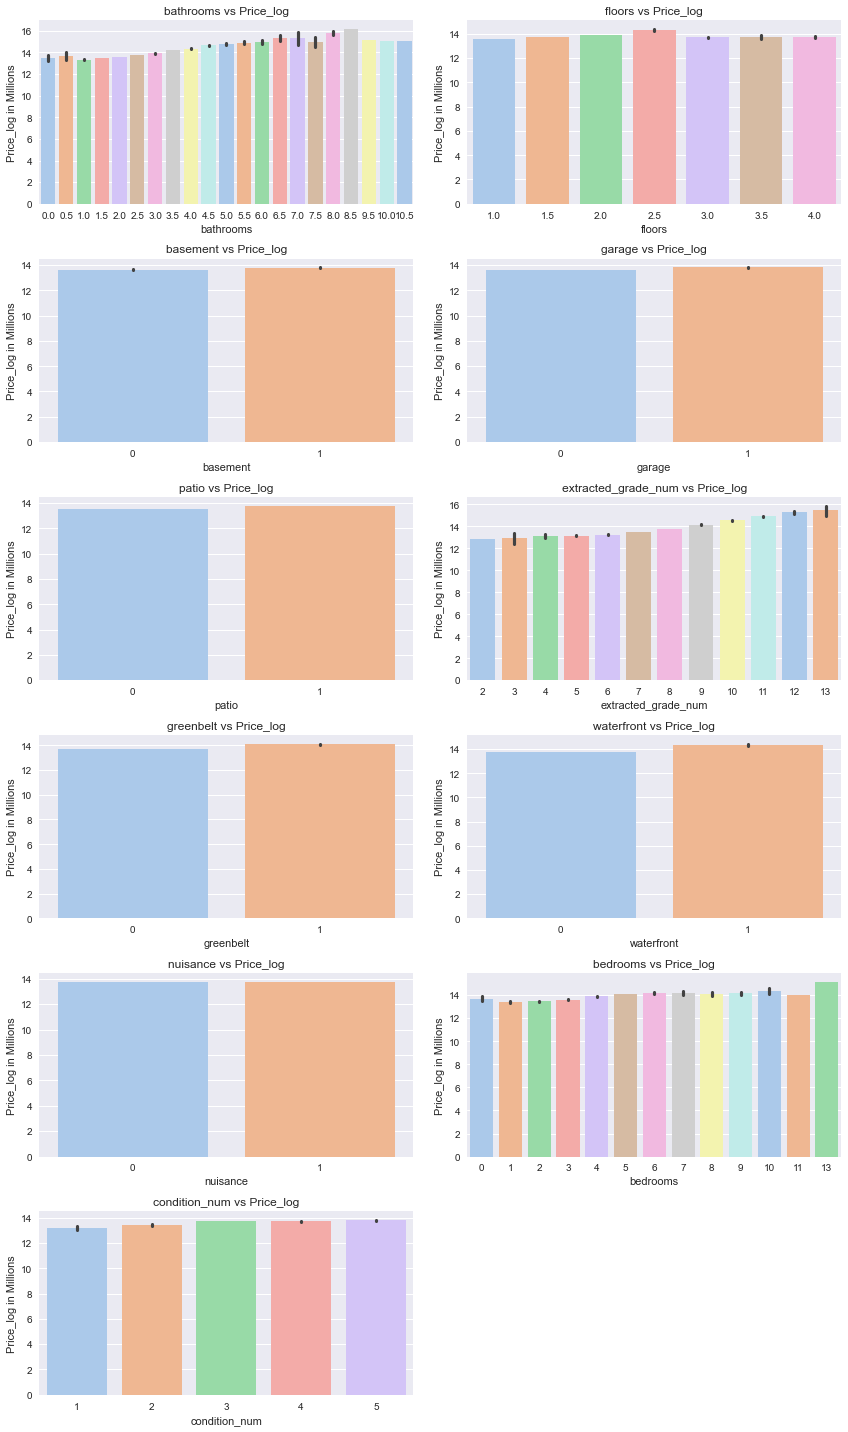

In [294]:
categorical_bar(king, categoricals)

**Observations:**

Bathrooms: 

* Extra bathrooms in a home does contribute to the value of home. This peaks out at around 7 bathrooms. 
* After 7 bathrooms there is a sudden dip in price but then increases dramatically then decreases dramatically. It is not very reliable data beyond seven bathrooms. 
* Price is positively correlated with bathrooms being .51

Grade Number: 
* The quality build of the home does contribute to the value of the home. The price peak is a grade 13 being the best build quality. 
* Price is positively correlated with grade being .61

Green Belt: 
* It seems being next to a green belt in a home does contribute to the value of a home. Homes next to a green belt are priced much higher than homes not next to a green belt. 
* Price has little to no correlation with green belt. 
* Despite that being true being next a green belt in it seems that its is guarantee that the home would be priced higher in comparison to homes without a green belt

Waterfront:
* It seems being next to a green belt in a home does contribute to the value of a home. Homes next to a green belt are priced much higher than homes not next to a green belt. 
* Price has little to no correlation with waterfront. 
* Despite that being true being next to a waterfront guarantees that the home would be priced higher in comparison to homes without a waterfront.

Nuisance: 
* It seems that traffic does not do much in terms of impact home value. 

Bedrooms:
* Adding bedrooms to a home does increase its value. This seems to peak at 7 bedrooms. After 7 bedrooms it begins to decrease.

Condition:
* The condition of a home does increase its value. Average(3), Good(4), Very Good(5) are the categories to aim for maximizing home price. Majority of the houses are in condition 3 (average) and these homes perform equally as well as those with condition 4 (good) and condition 5 (very good). 


## Does location matter for homes?

In [295]:
"""
We have two ways to determine a homes location. There is the coordinates and address. 
The address contains the zip code and we already have the price information.
With the coordinates maybe we can attempt to creata a heatmap with the interaction being price. 
"""

'\nWe have two ways to determine a homes location. There is the coordinates and address. \nThe address contains the zip code and we already have the price information.\nWith the coordinates maybe we can attempt to creata a heatmap with the interaction being price. \n'

In [296]:
print(king.columns)

king['address'].head(5)

Index(['date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'greenbelt',
       'nuisance', 'grade', 'heat_source', 'sewer_system', 'yr_built',
       'address', 'lat', 'long', 'basement', 'extracted_grade_num',
       'condition_num', 'price_log', 'sqft_living_log', 'sqft_above_log',
       'sqft_lot_log', 'garage', 'patio'],
      dtype='object')


21177    1526 I Street Northeast, Auburn, Washington 98...
10844    1412 I Street Northeast, Auburn, Washington 98...
9292     1104 Southwest Shorebrook Drive, Normandy Park...
17878    7205 South 133rd Street, Seattle, Washington 9...
14450    5610 South 141st Street, Tukwila, Washington 9...
Name: address, dtype: object

In [297]:
# We need to extract the zipcode and an example of an address is this
king['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [298]:
# All the addresses follow the same format. #### street, city, state zipcode, country

# Extract the numbers using a regular expression and store it in a new column 'zipcode'
# , matches the comma in the address.
# \s* matches any number of spaces after the comma (optional spaces).
# (\d{5}) captures the five-digit number (the zip code).
# , matches the comma after the zip code.
# \s* matches any number of spaces after the comma (optional spaces).
# \w+ matches one or more word characters (representing the state name).
king['zipcode'] = king['address'].str.extract(r',\s*\w+\s*(\d{5}),')
king['zipcode_encoded'] = pd.factorize(king['zipcode'])[0]

# Print the DataFrame with the extracted zip code to check them
print(king[['zipcode_encoded','zipcode']])


       zipcode_encoded zipcode
21177                0   98002
10844                0   98002
9292                 1   98166
17878                2   98178
14450                3   98168
...                ...     ...
26982                1   98166
29172                1   98166
22523                1   98166
18938                1   98166
26110               90   98125

[30110 rows x 2 columns]


In [299]:
# Create a dictionary that maps each encoded number back to its original zip code
reverse_zipcode_mapping = dict(
    zip(
        king['zipcode_encoded'],
        king['zipcode']
    )
)

In [300]:
# Access the reverse mapping dictionary to get the original zip code from the encoded number
encoded_number = 0  # Replace this with the specific encoded number we may want to look up
original_zipcode = reverse_zipcode_mapping.get(encoded_number, "Not Found")
print("Original Zip Code:", original_zipcode)


Original Zip Code: 98002


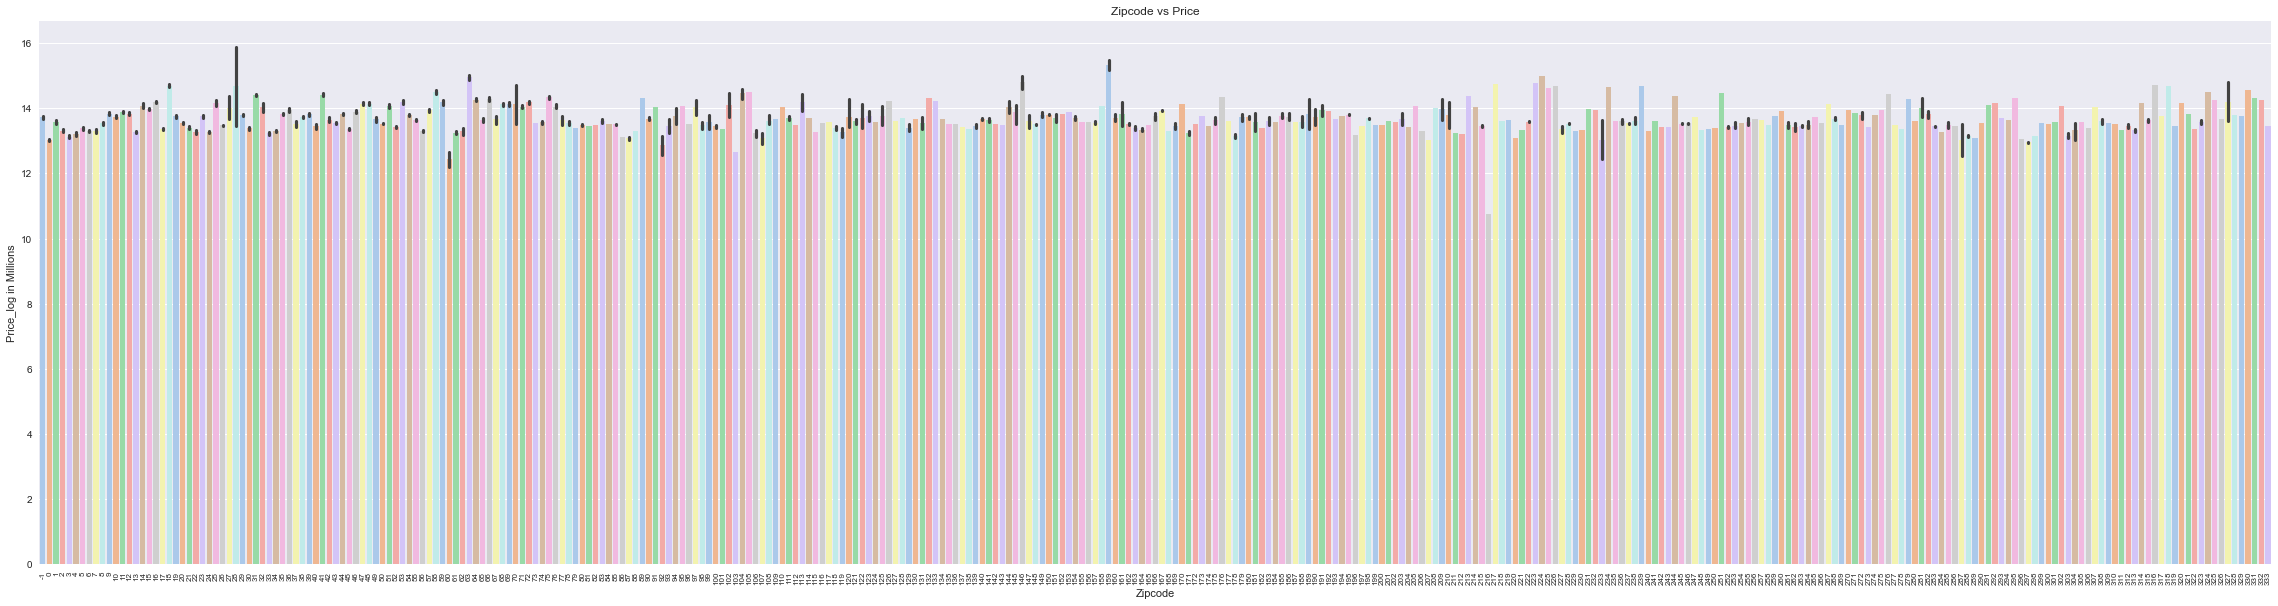

In [301]:
# plot barplot of zipcode vs price
plt.figure(figsize=(40,10))
sns.barplot(x=king['zipcode_encoded'], y=king['price_log'], palette="pastel")
plt.title('Zipcode vs Price')
plt.xlabel('Zipcode')
plt.ylabel('Price_log in Millions')
plt.xticks(fontsize = 8, rotation = 90)
plt.show()

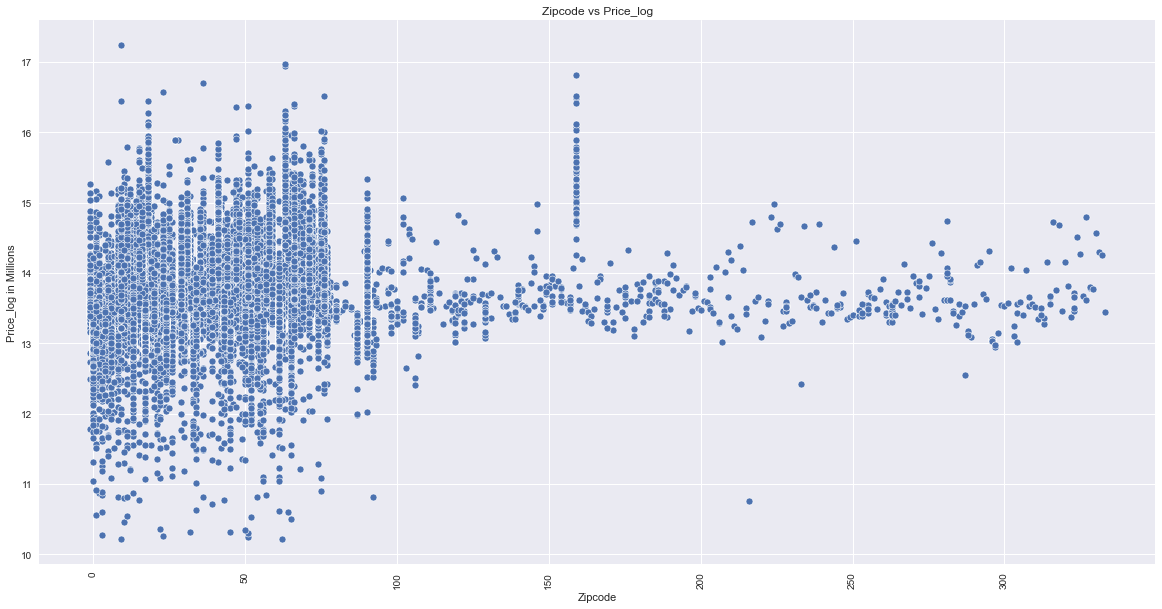

In [302]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Plot histogram
sns.scatterplot(data=king, x='zipcode_encoded', y='price_log', palette="pastel")

# labels
plt.title('Zipcode vs Price_log')
plt.xlabel('Zipcode')
plt.ylabel('Price_log in Millions')
plt.xticks(rotation = 90)
plt.show()

It is clear that there are way to many zipcodes in this dataset. 

However there are areas that show that a homes location matters in King County. By seeing the barplot we can see that there are ocassional peaks for zipcodes that can place homes higher in price than others. Using the scatterplot shows how the data was skewed towards homes in locations less than the encoded zipcode 100. 

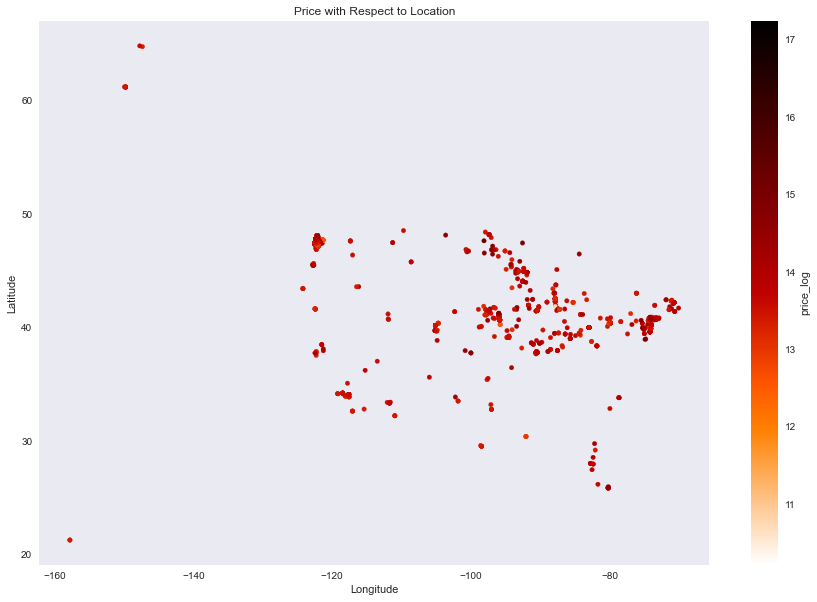

In [303]:
# Create a scatter plot for latitude and longitude values
king.plot(
    kind="scatter", 
    x='long', 
    y='lat', 
    figsize=(15, 10), 
    c='price_log', 
    cmap="gist_heat_r", 
    colorbar=True, 
    sharex=False
)
plt.grid(which='both')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price with Respect to Location')
plt.show()


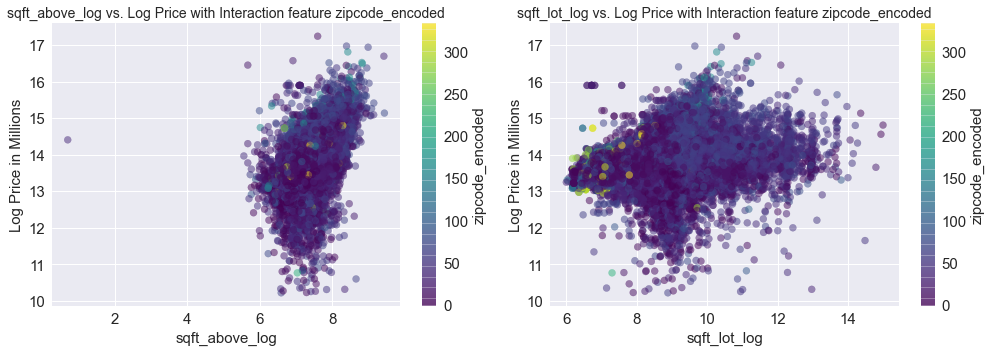

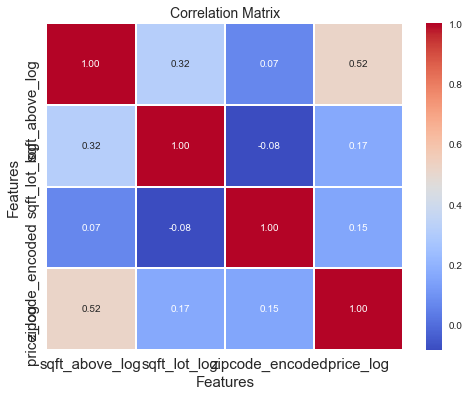

In [304]:
interactions = ['zipcode_encoded']
subset = ["sqft_above_log", "sqft_lot_log"]

price_interactions(data=king, subset=subset, interactions=interactions)

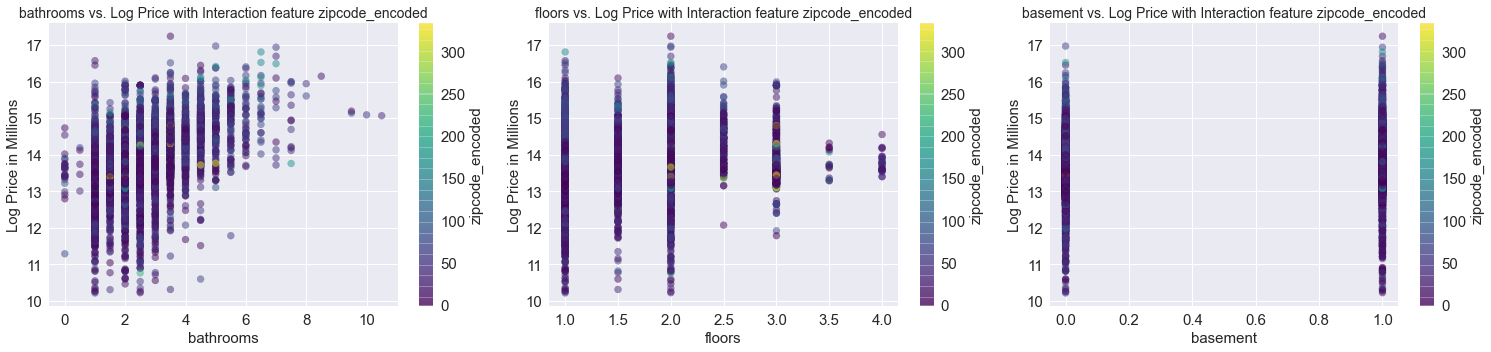

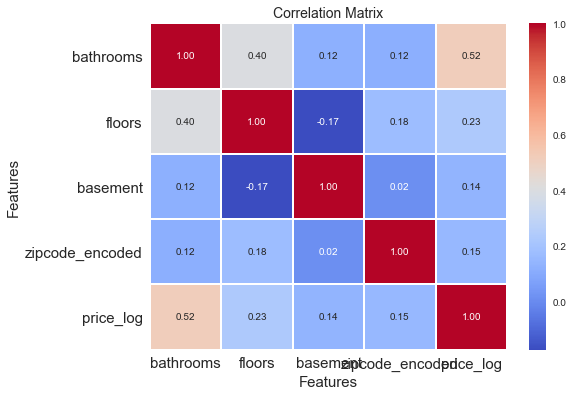

In [305]:
interactions = ['zipcode_encoded']
categoricals = ["bathrooms", "floors", "basement"]


price_interactions(data=king, subset=categoricals, interactions=interactions)

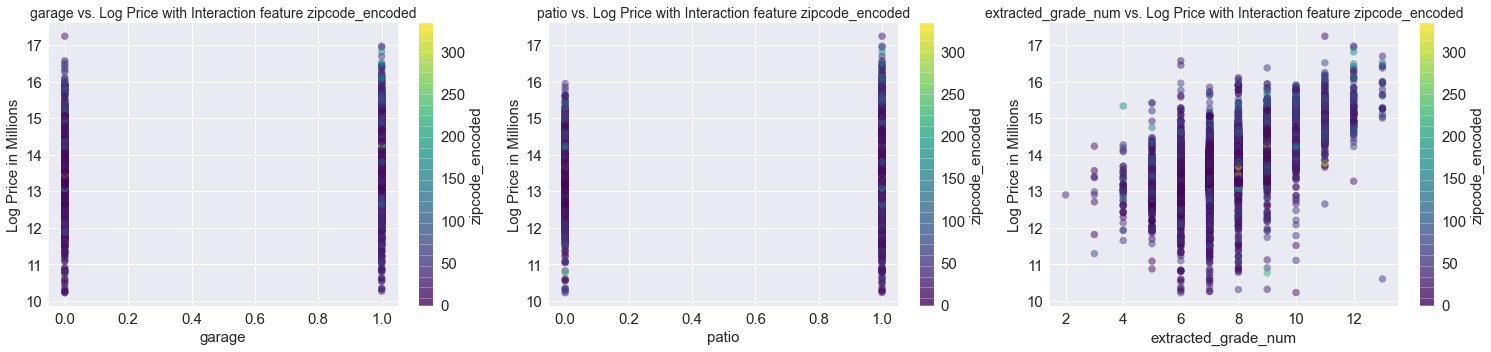

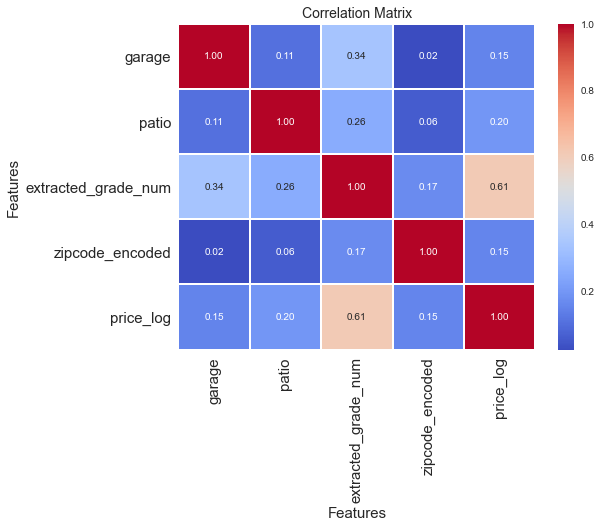

In [306]:
interactions = ['zipcode_encoded']
categoricals = ["garage", "patio", "extracted_grade_num"]


price_interactions(data=king, subset=categoricals, interactions=interactions)

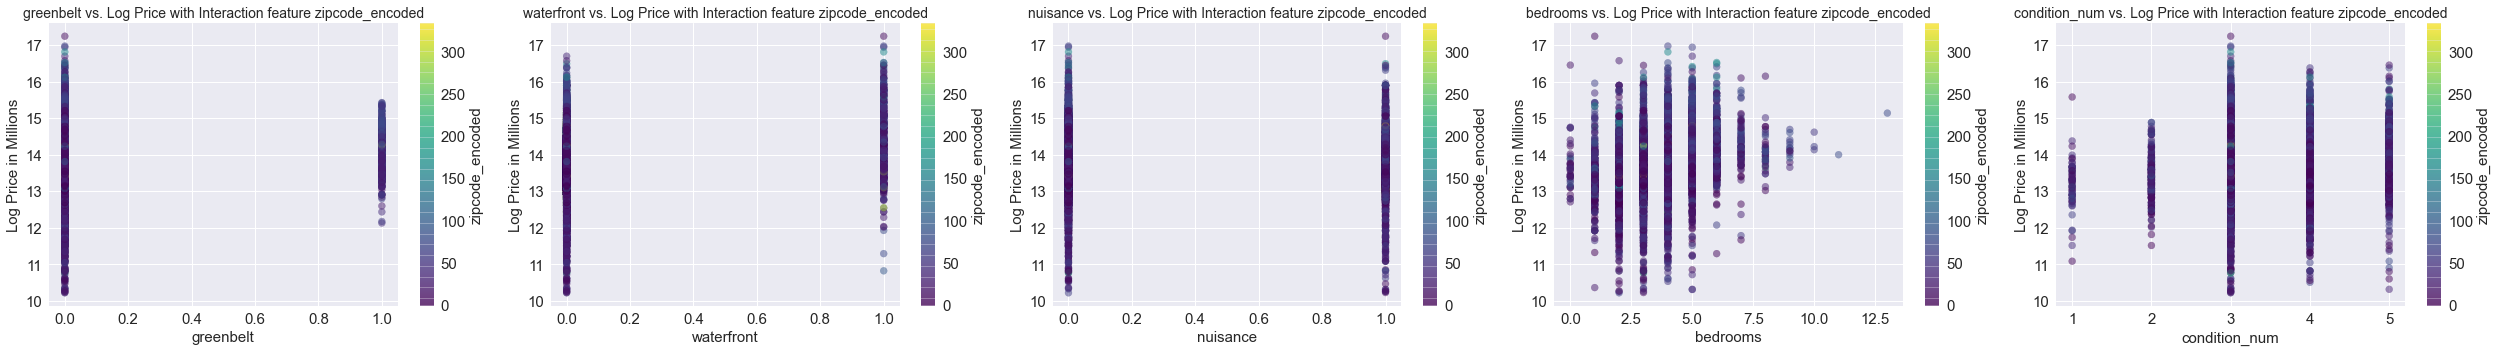

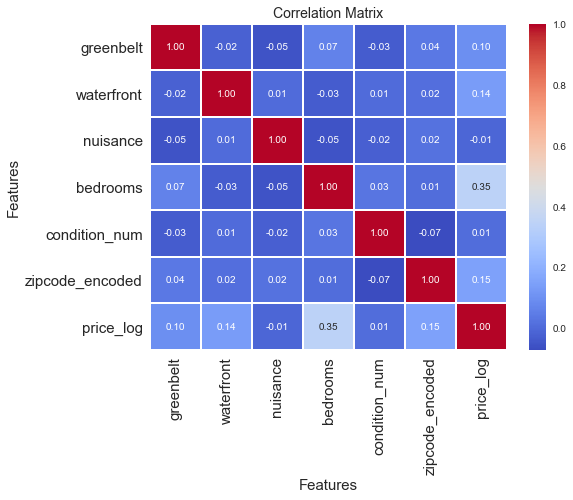

In [307]:
interactions = ['zipcode_encoded']
categoricals = ["greenbelt", "waterfront", "nuisance", "bedrooms", "condition_num"]


price_interactions(data=king, subset=categoricals, interactions=interactions)


**Observations:**
1. It seems location does matter to a degree. It also seems that the main limitation to this data set is the representation of the entire king county. We have a big cluster of homes up to encoded zipcode 100 and after that it becomes scarce. We can also see that in the heatmap for lat and long. Overall, we can not see a full display of whether location does matter for a homes price in king county. We can not say confidently where in King County are homes priced higher. What we can say is adding features in the same location improves price. In other locations it can even increase the price by a lot in certain locations. 

## Start Preparation for Creating Models


The first thing to do is to clean up the dataframe then check for any multicollinarity issues

In [308]:
king.columns

Index(['date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'greenbelt',
       'nuisance', 'grade', 'heat_source', 'sewer_system', 'yr_built',
       'address', 'lat', 'long', 'basement', 'extracted_grade_num',
       'condition_num', 'price_log', 'sqft_living_log', 'sqft_above_log',
       'sqft_lot_log', 'garage', 'patio', 'zipcode', 'zipcode_encoded'],
      dtype='object')

In [309]:
"""
We do not need date, address, yr_built, lat, and long as well as zipcode since we encoded it.
"""

'\nWe do not need date, address, yr_built, lat, and long as well as zipcode since we encoded it.\n'

In [310]:
subset = ['date', 'grade', 'address', 'lat', 'long', 'yr_built', 'zipcode']
king.drop(labels=subset, axis=1, inplace=True)

In [311]:
king.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'greenbelt',
       'nuisance', 'heat_source', 'sewer_system', 'basement',
       'extracted_grade_num', 'condition_num', 'price_log', 'sqft_living_log',
       'sqft_above_log', 'sqft_lot_log', 'garage', 'patio', 'zipcode_encoded'],
      dtype='object')

In [312]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=king.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [313]:
df[(df.cc>.75) & (df.cc <1)]

cc
pairs                                      
(sqft_living_log, sqft_above_log)  0.874526
(sqft_living_log, bathrooms)       0.762857

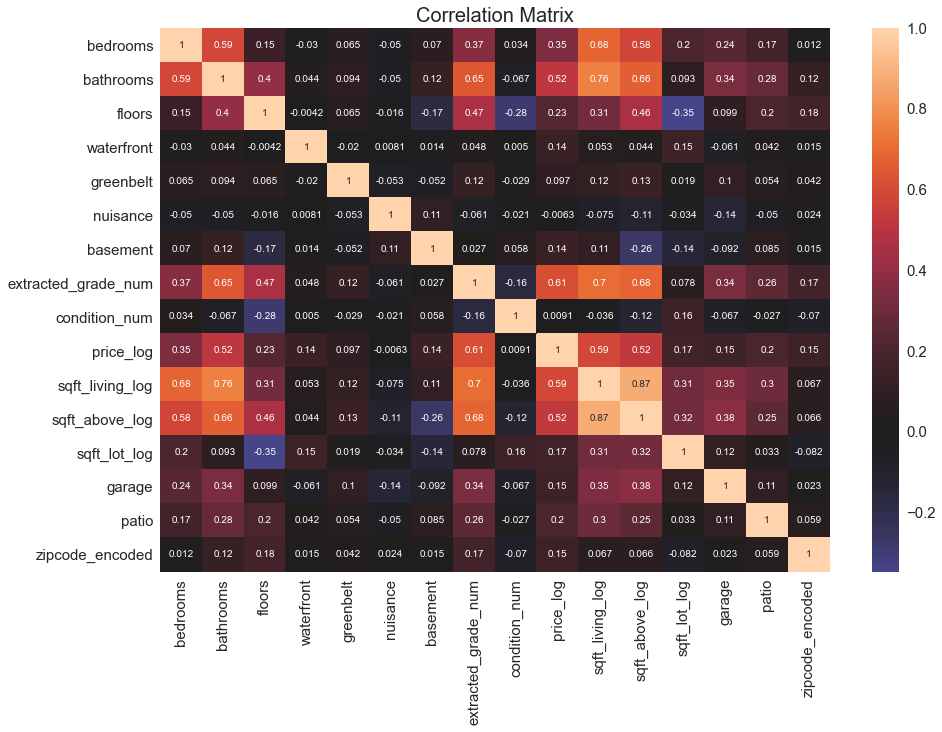

In [323]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(data=king.corr(), center=0, annot=True);
plt.title("Correlation Matrix", fontsize=20)
plt.tick_params(axis='both', labelsize=15)

# Adjust the font size of the color bar labels
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

Overall correlation between .75 and less than 1 is an indication of multicollinearity. Lets now view each of the features in correlation to price. Lets view log features and normal features seperately. We will have to determine which variables to drop from each set to avoid multicollinearity. 

**Observations:**
* There are two pairs that can show multicollinearity. 
* Based off these pairs we should drop sqft_living_log since this appeared the most times. 

In [1002]:
# drop features 
king.drop(labels=["sqft_living_log"], axis=1, inplace=True)

In [1003]:
king.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'greenbelt',
       'nuisance', 'heat_source', 'sewer_system', 'basement',
       'extracted_grade_num', 'condition_num', 'price_log', 'sqft_above_log',
       'sqft_lot_log', 'garage', 'patio', 'zipcode_encoded'],
      dtype='object')

In [1004]:
king.head()

bedrooms  bathrooms  floors  waterfront  greenbelt  nuisance  \
21177         3        1.5     1.0           0          0         0   
10844         4        1.5     1.5           0          0         0   
9292          5        2.0     1.0           0          0         0   
17878         5        2.0     1.0           0          0         0   
14450         3        2.0     1.5           0          0         0   

      heat_source sewer_system  basement  extracted_grade_num  condition_num  \
21177         Oil       PUBLIC         0                    7              4   
10844         Gas       PUBLIC         0                    7              4   
9292          Oil       PUBLIC         1                    8              4   
17878         Oil      PRIVATE         1                    7              3   
14450         Gas       PUBLIC         0                    7              5   

       price_log  sqft_above_log  sqft_lot_log  garage  patio  zipcode_encoded  
21177  12.422989        7.489971     10.591823       1      1                0  
10844  13.319574        7.710653      9.462343       1      1                0  
9292   13.835313        7.229839      9.626152       0      0                1  
17878  13.321214        7.098376      9.651945       0      1                2  
14450  13.458836        7.450080      9.061840       0      0                3

Now that we got rid of multicollinearity issues we need to convert our categorical variables into usable variables for our model by using the dummies method. So far we have this ...

In [1005]:
king_continuous = king[['price_log', 'sqft_lot_log', 'sqft_above_log']]
# Ordinal is like categorical however there is a distinction between catergories and you can rank them. This would suggest that it would not require one hot encoding.
king_ordinals = king[['bedrooms', 'bathrooms', 'floors', 'condition_num', 'extracted_grade_num']]
king_categoricals = king[['waterfront', 'greenbelt', 'basement', 'garage', 'patio', 'sewer_system', 'heat_source', 'zipcode_encoded']]

## Prepare Categorical Data with One Hot Encoding

In [1007]:
# One hot encode king_categoricals
# Make sure all data types are strings first
king['waterfront'] = king['waterfront'].astype('str')
king['greenbelt'] = king['greenbelt'].astype('str')
king['basement'] = king['basement'].astype('float64').astype('str')
king['garage'] = king['garage'].astype('float64').astype('str')
king['patio'] = king['patio'].astype('Float64').astype('str')
king['sewer_system'] = king['sewer_system'].astype('str')
king['heat_source'] = king['heat_source'].astype('str')
king['zipcode_encoded'] = king['zipcode_encoded'].astype('float64').astype('str')

In [1008]:
# Create the dummy variables
waterfront_dummies = pd.get_dummies(king['waterfront'], prefix='waterfront', drop_first=True)
greenbelt_dummies = pd.get_dummies(king['greenbelt'], prefix='greenbelt', drop_first=True)
garage_dummies = pd.get_dummies(king['garage'], prefix='garage', drop_first=True)
basement_dummies = pd.get_dummies(king['basement'], prefix='basement', drop_first=True)
patio_dummies = pd.get_dummies(king['patio'], prefix='patio', drop_first=True)
zip_dummies = pd.get_dummies(king['zipcode_encoded'], prefix='zipcode', drop_first=True)
sewer_dummies = pd.get_dummies(king['sewer_system'], prefix='sewer') # drop manually since there is a huge disparity between the types of sewers.
heat_dummies = pd.get_dummies(king['heat_source'], prefix='heat') # drop manually since there is a huge disparity between sources of heat.

Create a clean dataframe that can be used for modeling.

In [1012]:
# Merge dummies, categoricals, and continuous columns
clean_df = pd.concat([king_continuous, king_ordinals, king_categoricals, waterfront_dummies, greenbelt_dummies, basement_dummies, garage_dummies, patio_dummies, sewer_dummies, heat_dummies, zip_dummies], axis=1)

In [1013]:
clean_df.head()

price_log  sqft_lot_log  sqft_above_log  bedrooms  bathrooms  floors  \
21177  12.422989     10.591823        7.489971         3        1.5     1.0   
10844  13.319574      9.462343        7.710653         4        1.5     1.5   
9292   13.835313      9.626152        7.229839         5        2.0     1.0   
17878  13.321214      9.651945        7.098376         5        2.0     1.0   
14450  13.458836      9.061840        7.450080         3        2.0     1.5   

       condition_num  extracted_grade_num  waterfront  greenbelt  ...  \
21177              4                    7           0          0  ...   
10844              4                    7           0          0  ...   
9292               4                    8           0          0  ...   
17878              3                    7           0          0  ...   
14450              5                    7           0          0  ...   

       zipcode_90.0  zipcode_91.0  zipcode_92.0 zipcode_93.0 zipcode_94.0  \
21177             0             0             0            0            0   
10844             0             0             0            0            0   
9292              0             0             0            0            0   
17878             0             0             0            0            0   
14450             0             0             0            0            0   

       zipcode_95.0  zipcode_96.0  zipcode_97.0  zipcode_98.0  zipcode_99.0  
21177             0             0             0             0             0  
10844             0             0             0             0             0  
9292              0             0             0             0             0  
17878             0             0             0             0             0  
14450             0             0             0             0             0  

[5 rows x 366 columns]

In [1014]:
clean_df.columns

Index(['price_log', 'sqft_lot_log', 'sqft_above_log', 'bedrooms', 'bathrooms',
       'floors', 'condition_num', 'extracted_grade_num', 'waterfront',
       'greenbelt',
       ...
       'zipcode_90.0', 'zipcode_91.0', 'zipcode_92.0', 'zipcode_93.0',
       'zipcode_94.0', 'zipcode_95.0', 'zipcode_96.0', 'zipcode_97.0',
       'zipcode_98.0', 'zipcode_99.0'],
      dtype='object', length=366)

In [1015]:
print(clean_df['sewer_PRIVATE'].value_counts())
print('SPACE')
print(clean_df['sewer_PRIVATE RESTRICTED'].value_counts())
print('SPACE')
print(clean_df['sewer_PUBLIC'].value_counts())
print('SPACE')
print(clean_df['sewer_PUBLIC RESTRICTED'].value_counts())

0    25774
1     4336
Name: sewer_PRIVATE, dtype: int64
SPACE
0    30105
1        5
Name: sewer_PRIVATE RESTRICTED, dtype: int64
SPACE
1    25766
0     4344
Name: sewer_PUBLIC, dtype: int64
SPACE
0    30107
1        3
Name: sewer_PUBLIC RESTRICTED, dtype: int64


In [1016]:
print(clean_df['heat_Electricity'].value_counts())
print('SPACE')
print(clean_df['heat_Electricity/Solar'].value_counts())
print('SPACE')
print(clean_df['heat_Gas'].value_counts())
print('SPACE')
print(clean_df['heat_Gas/Solar'].value_counts())
print('SPACE')
print(clean_df['heat_Oil'].value_counts())
print('SPACE')
print(clean_df['heat_Oil/Solar'].value_counts())
print('SPACE')
print(clean_df['heat_Other'].value_counts())

0    23650
1     6460
Name: heat_Electricity, dtype: int64
SPACE
0    30051
1       59
Name: heat_Electricity/Solar, dtype: int64
SPACE
1    20575
0     9535
Name: heat_Gas, dtype: int64
SPACE
0    30017
1       93
Name: heat_Gas/Solar, dtype: int64
SPACE
0    27211
1     2899
Name: heat_Oil, dtype: int64
SPACE
0    30106
1        4
Name: heat_Oil/Solar, dtype: int64
SPACE
0    30090
1       20
Name: heat_Other, dtype: int64


In [1017]:
# drop original data since dummies have been made
# drop sewer_PUBLIC RESTRICTED and PRIVATE RESTRICTED dummies since they make up a very small percentage of the data
# drop heat_Other and heat_Oil/Solar dummies since other is not very meaningful and they also make up a very small percentage of the data.
clean_df.drop(
    labels=[
        "waterfront", 
        'greenbelt', 
        'basement', 
        'garage', 
        'patio', 
        'sewer_system', 
        'heat_source',
        'heat_Other', 
        'heat_Oil/Solar', 
        'sewer_PUBLIC RESTRICTED', 
        'sewer_PRIVATE RESTRICTED', 
        'zipcode_encoded'
        ], 
    axis=1,
    inplace=True
)

In [1018]:
clean_df.columns

Index(['price_log', 'sqft_lot_log', 'sqft_above_log', 'bedrooms', 'bathrooms',
       'floors', 'condition_num', 'extracted_grade_num', 'waterfront_1',
       'greenbelt_1',
       ...
       'zipcode_90.0', 'zipcode_91.0', 'zipcode_92.0', 'zipcode_93.0',
       'zipcode_94.0', 'zipcode_95.0', 'zipcode_96.0', 'zipcode_97.0',
       'zipcode_98.0', 'zipcode_99.0'],
      dtype='object', length=354)

In [1019]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=clean_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [1020]:
df[(df.cc>.75) & (df.cc <1)]

cc
pairs                                  
(sewer_PUBLIC, sewer_PRIVATE)  0.998924
(heat_Gas, heat_Electricity)   0.767733

Drop heat_Electricity since more people use gas. Drop sewer_Private since more people use public

In [1021]:
clean_df.drop(labels=['heat_Electricity', 'sewer_PRIVATE'], axis=1, inplace=True)

In [1022]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=clean_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [1023]:
df[(df.cc>.75) & (df.cc <1)]

Empty DataFrame
Columns: [cc]
Index: []

In [1024]:
clean_df.head()

price_log  sqft_lot_log  sqft_above_log  bedrooms  bathrooms  floors  \
21177  12.422989     10.591823        7.489971         3        1.5     1.0   
10844  13.319574      9.462343        7.710653         4        1.5     1.5   
9292   13.835313      9.626152        7.229839         5        2.0     1.0   
17878  13.321214      9.651945        7.098376         5        2.0     1.0   
14450  13.458836      9.061840        7.450080         3        2.0     1.5   

       condition_num  extracted_grade_num  waterfront_1  greenbelt_1  ...  \
21177              4                    7             0            0  ...   
10844              4                    7             0            0  ...   
9292               4                    8             0            0  ...   
17878              3                    7             0            0  ...   
14450              5                    7             0            0  ...   

       zipcode_90.0  zipcode_91.0  zipcode_92.0  zipcode_93.0  zipcode_94.0  \
21177             0             0             0             0             0   
10844             0             0             0             0             0   
9292              0             0             0             0             0   
17878             0             0             0             0             0   
14450             0             0             0             0             0   

       zipcode_95.0  zipcode_96.0  zipcode_97.0  zipcode_98.0  zipcode_99.0  
21177             0             0             0             0             0  
10844             0             0             0             0             0  
9292              0             0             0             0             0  
17878             0             0             0             0             0  
14450             0             0             0             0             0  

[5 rows x 352 columns]

In [1025]:
# save dataframe as csv
clean_df.to_csv('../data/clean.csv')

In [218]:
# Save the zipcode dictionary 
import pickle

# Specify the file path where you want to save the dictionary
file_path = '../data/reverse_zipcode_mapping.pkl'

# Save the dictionary to a file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(reverse_zipcode_mapping, file)

Reverse zipcode mapping saved to ../data/reverse_zipcode_mapping.pkl


In [220]:
# Load the dictionary from the file using pickle
with open(file_path, 'rb') as file:
    reverse_zipcode_mapping = pickle.load(file)
# Loop through the key-value pairs and print them
for encoded_zip, original_zip in reverse_zipcode_mapping.items():
    print(f"Encoded Zipcode: {encoded_zip} -> Original Zipcode: {original_zip}")

Encoded Zipcode: 0 -> Original Zipcode: 98002
Encoded Zipcode: 1 -> Original Zipcode: 98166
Encoded Zipcode: 2 -> Original Zipcode: 98178
Encoded Zipcode: 3 -> Original Zipcode: 98168
Encoded Zipcode: 4 -> Original Zipcode: 98032
Encoded Zipcode: 5 -> Original Zipcode: 98108
Encoded Zipcode: 6 -> Original Zipcode: 98022
Encoded Zipcode: 7 -> Original Zipcode: 98057
Encoded Zipcode: 8 -> Original Zipcode: 98118
Encoded Zipcode: 9 -> Original Zipcode: 98122
Encoded Zipcode: 10 -> Original Zipcode: 98144
Encoded Zipcode: 11 -> Original Zipcode: 98115
Encoded Zipcode: 12 -> Original Zipcode: 98116
Encoded Zipcode: 13 -> Original Zipcode: 98001
Encoded Zipcode: 14 -> Original Zipcode: 98007
Encoded Zipcode: 15 -> Original Zipcode: 98034
Encoded Zipcode: 16 -> Original Zipcode: 98052
Encoded Zipcode: 17 -> Original Zipcode: 98042
Encoded Zipcode: 18 -> Original Zipcode: 98040
Encoded Zipcode: 19 -> Original Zipcode: 98136
Encoded Zipcode: 20 -> Original Zipcode: 98126
Encoded Zipcode: 21 -> 